In [ ]:
#  데이터 처리 모듈
import pandas as pd
from sklearn.impute import KNNImputer
# 행렬 등 통계 연산 모듈
import numpy as np
from scipy.stats import iqr
from sklearn.impute import KNNImputer
# 지수형 표기법 e를 연속형 변환
pd.options.display.float_format = '{:.4f}'.format
# 타입 어노테이션(Any, Sequence 등의 메서드 활용)
from typing import *
import os

# 구글 드라이브 마운트
from google.colab import drive
drive.mount("/content/drive")
import os

# 조합 찾는 반복문 메서드
from itertools import permutations
from itertools import combinations

# 데이터 시각화
import matplotlib.pyplot as plt
# from matplotlib.pyplot import
import matplotlib.font_manager as fm
import missingno as msno
import seaborn as sns

Mounted at /content/drive


In [ ]:
# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r"/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
    # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')
# 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)
# Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})
# 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
class LoadGoogleDriveData():
  def __init__(self, data = None):
    self.data = data

  def loadData(self, file_path: str, file_name_extension,
               columnTF: bool, unicode: str) -> pd.DataFrame():
    self.data = pd.read_csv(os.path.join(file_path + file_name_extension),
                            index_col = columnTF,
                            sep = ",",
                            na_values = "NaN",
                            encoding = unicode)
    return self.data

  def loadTxTData(self, file_path: str, file_name_extension,
               columnTF: bool, unicode: str) -> pd.DataFrame():
    self.data = pd.read_csv(os.path.join(file_path + file_name_extension),
                            index_col = columnTF,
                            sep = "|",
                            na_values = "NaN",
                            encoding = unicode)
    return self.data

  def loadExcelData(self, file_path: str, file_name_extension,
               columnTF: bool) -> pd.DataFrame():
    self.data = pd.read_excel(os.path.join(file_path + file_name_extension),
                              index_col = columnTF)
    return self.data

  # 용량이 큰 csv 파일 읽어오기(fopen - fread와 유사한 방식)
  def loadDataWithChunking(self, file_path: str, file_name_extension,
                           chunking_row_num: int, columnTF: bool, unicode: str) -> pd.DataFrame():
    chunkdata = pd.read_csv(os.path.join(file_path + file_name_extension),
                            chunksize = chunking_row_num,
                            index_col = columnTF,
                            sep = ",",
                            na_values = "NaN",
                            encoding = unicode)
    self.data = list(chunkdata)
    self.data = pd.concat(self.data)

    return self.data

In [ ]:
mountInstance = LoadGoogleDriveData()

### 1.오아시스 비즈니스(필지고유번호 & 법정동읍면동코드 & 외식업종)  데이터

In [ ]:
CONTEST_2022 = mountInstance.loadDataWithChunking(
    file_path = "/content/drive/MyDrive/2023BigContest/data/contest data/", file_name_extension = "필지단위 소상공인 매출등급 정보.csv",
    unicode = "cp949", chunking_row_num = 10**5, columnTF = False)

In [ ]:
CONTEST_2023 = mountInstance.loadExcelData(
    file_path = "/content/drive/MyDrive/2023BigContest/data/contest data/", file_name_extension = "소상공인 매출등급 예상 대상 필지.xlsx",
    columnTF = False)

```
CONTEST_2023 = mountInstance.loadDataWithChunking(
    file_path = "/content/drive/MyDrive/2023BigContest/data/contest data/", file_name_extension = "소상공인 매출등급 예상 대상 필지.csv",
    unicode = "cp949", chunking_row_num = 10**5, columnTF = False)
```

### 2. KCD(상권코드 & 외식업종 중분류) 소상공인 신용데이터

In [ ]:
KCD_2022_2023 = mountInstance.loadData(
    file_path = "/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/", file_name_extension = "SOHO_MERGE_DATA_LIST.csv",
    unicode = "utf-8", columnTF = False)

### 3. 행정동코드 - 상권코드 매핑 데이터

In [ ]:
MARKET_LOC_MAP = mountInstance.loadData(
    file_path = "/content/drive/MyDrive/2023BigContest/data/",
    file_name_extension = "market_loc_map.csv",
    unicode = "euc-kr", columnTF = False)

MARKET_CODE_NAME_MAP = mountInstance.loadData(
    file_path = "/content/drive/MyDrive/2023BigContest/data/",
    file_name_extension = "market_loc_name_map.csv",
    unicode = "euc-kr", columnTF = False)

In [ ]:
MARKET_LOC_MAP

,상권_코드_2022,상권_코드_2023,행정동_코드,법정동_코드,STDG_EMD_CD
0,2110008,3110008,11110515,11110101,11110101
1,2110008,3110008,11110515,11110102,11110102
2,2110008,3110008,11110515,11110103,11110103
3,2110008,3110008,11110515,11110104,11110104
4,2110008,3110008,11110515,11110105,11110105
...,...,...,...,...,...
3453,2130102,3130102,11230750,11230110,11230110
3454,2130166,3130166,11380590,11380107,11380107
3455,2130113,3130113,11260690,11260106,11260106
3456,2130124,3130124,11290780,11290138,11290138


In [ ]:
MARKET_CODE_NAME_MAP

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,형태정보
0,202212,A,골목상권,3110008,배화여자대학교(박노수미술관),197093,453418,11110,11110515,NaN
1,202212,A,골목상권,3110009,자하문터널,196991,455057,11110,11110550,NaN
2,202212,A,골목상권,3110010,평창동서측,197064,456643,11110,11110560,NaN
3,202212,A,골목상권,3110017,정독도서관,198581,453781,11110,11110600,NaN
4,202212,A,골목상권,3110018,중앙고등학교,198883,453690,11110,11110600,NaN
...,...,...,...,...,...,...,...,...,...,...
1645,202212,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,198397,451614,11140,11140520,NaN
1646,202212,U,관광특구,3001493,동대문패션타운 관광특구,200996,451976,11140,11140590,NaN
1647,202212,U,관광특구,3001494,종로?청계 관광특구,199796,452274,11110,11110615,NaN
1648,202212,U,관광특구,3001495,잠실 관광특구,210188,446334,11710,11710566,NaN


In [ ]:
# MARKET_LOC_MAP.drop(["상권_코드_2022", "상권_코드_2023"], axis = 1, inplace = True)

### 4. 서울열린데이터광장 상권특성 공공데이터

In [ ]:
MERGE_2022_DATA = mountInstance.loadData(
    file_path = "/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/", file_name_extension = "MARKET_RAW_2022_DATA.csv",
    unicode = "utf-8", columnTF = False).drop_duplicates()
# MERGE_2022_NAZERO_DATA = MERGE_2022_DATA.fillna(0)

<ipython-input-3-00b8d12dba61>:7: DtypeWarning: Columns (26,27,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(os.path.join(file_path + file_name_extension),


In [ ]:
print(len(MERGE_2022_DATA), len(MERGE_2022_DATA[MERGE_2022_DATA["상권_코드_명"].isna() == False]))

192718 192718


In [ ]:
MERGE_2023_DATA = mountInstance.loadData(
    file_path = "/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/", file_name_extension = "MARKET_RAW_2023_DATA.csv",
    unicode = "utf-8", columnTF = False).drop_duplicates()
# MERGE_2023_NAZERO_DATA = MERGE_2023_DATA.fillna(0)

<ipython-input-3-00b8d12dba61>:7: DtypeWarning: Columns (5,26,27,86,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(os.path.join(file_path + file_name_extension),


In [ ]:
pd.set_option("display.max_row", 6)
pd.set_option("display.max_column", None)

In [ ]:
MERGE_2023_DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8263 entries, 0 to 141704
Data columns (total 93 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   기준_년_코드             8263 non-null   int64  
 1   기준_분기_코드            8263 non-null   int64  
 2   상권_구분_코드            8263 non-null   object 
 3   상권_구분_코드_명          8263 non-null   object 
 4   상권_코드               8263 non-null   int64  
 5   상권_코드_명             8263 non-null   object 
 6   월_평균_소득_금액          0 non-null      float64
 7   소득_구간_코드            0 non-null      float64
 8   지출_총금액              3317 non-null   float64
 9   식료품_지출_총금액          3317 non-null   float64
 10  의류_신발_지출_총금액        3317 non-null   float64
 11  생활용품_지출_총금액         3317 non-null   float64
 12  의료비_지출_총금액          3317 non-null   float64
 13  교통_지출_총금액           3317 non-null   float64
 14  여가_지출_총금액           3317 non-null   float64
 15  문화_지출_총금액           3317 non-null   float64
 16  교육_지

In [ ]:
MERGE_2023_DATA = MERGE_2023_DATA[MERGE_2023_DATA["상권_코드_명"].isna() == False]
MERGE_2023_DATA

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액,아파트_단지_수,아파트_가격_1_억_미만_세대_수,아파트_가격_1_억_세대_수,아파트_가격_2_억_세대_수,아파트_가격_3_억_세대_수,아파트_가격_4_억_세대_수,아파트_가격_5_억_세대_수,아파트_가격_6_억_이상_세대_수,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,집객시설_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,초등학교_수,중학교_수,고등학교_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,연령대_20_생활인구_수,연령대_30_생활인구_수,연령대_40_생활인구_수,연령대_50_생활인구_수,연령대_60_이상_생활인구_수,시간대_1_생활인구_수,시간대_2_생활인구_수,시간대_3_생활인구_수,시간대_4_생활인구_수,시간대_5_생활인구_수,시간대_6_생활인구_수,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,기준_년월_코드,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,형태정보,기준_월_코드,법정동_코드,STDG_EMD_CD,행정동_코드_명,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
0,2023,1,A,골목상권,3110001,이북5도청사,NaN,NaN,520427635.0000,129126028.0000,64853632.0000,37122367.0000,65974602.0000,88343761.0000,22223650.0000,14656697.0000,76185341.0000,21941557.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0000,2.0000,NaN,NaN,NaN,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202212.0000,196262.0000,456660.0000,11110.0000,11110560.0000,NaN,12.0000,11110182.0000,11110182.0000,평창동,HH,정체,111.0000,58.0000,104.0000,52.0000
1,2023,1,A,골목상권,3110001,이북5도청사,NaN,NaN,520427635.0000,129126028.0000,64853632.0000,37122367.0000,65974602.0000,88343761.0000,22223650.0000,14656697.0000,76185341.0000,21941557.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0000,2.0000,NaN,NaN,NaN,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202212.0000,196262.0000,456660.0000,11110.0000,11110560.0000,NaN,12.0000,11110183.0000,11110183.0000,평창동,HH,정체,111.0000,58.0000,104.0000,52.0000
6,2023,1,A,골목상권,3110002,독립문역 1번,NaN,NaN,232465205.0000,54998987.0000,28932090.0000,17084860.0000,28271372.0000,40933079.0000,10180461.0000,6575012.0000,35805283.0000,9684061.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0000,3.0000,1.0000,1.0000,NaN,4.0000,1.0000,1.0000,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,18.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202212.0000,196220.0000,452912.0000,11110.0000,11110570.0000,NaN,12.0000,11110187.0000,11110187.0000,무악동,HH,정체,105.0000,64.0000,104.0000,52.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141699,2023,1,R,전통시장,3130156,시영2단지 무지개종합상가(중계 무지개2단지아파트상가),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202212.0000,205794.0000,460391.0000,11350.0000,11350625.0000,NaN,12.0000,11350106.0000,11350106.0000,중계2?3동,LH,상권확장,97.0000,52.0000,104.0000,52.0000
141702,2023,1,D,발달상권,3120098,DMC(디지털미디어시티),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202212.0000,190266.0000,453378.0000,11440.0000,11440740.0000,NaN,12.0000,11440127.0000,11440127.0000,상암동,LL,다이나믹,75.0000,42.00

In [ ]:
MERGE_2022_DATA

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,...,기준_월_코드,법정동_코드,STDG_EMD_CD,행정동_코드_명,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
0,2022,4,A,골목상권,2110001,이북5도청사,4305934.0000,8.0000,520427635.0000,129126028.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,4,A,골목상권,2110001,이북5도청사,4305934.0000,8.0000,520427635.0000,129126028.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,4,A,골목상권,2110001,이북5도청사,4305934.0000,8.0000,520427635.0000,129126028.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270203,2022,3,U,관광특구,3001495,잠실 관광특구,NaN,NaN,NaN,NaN,...,12.0000,11710111.0000,11710111.0000,오륜동,HH,정체,148.0000,67.0000,122.0000,56.0000
270204,2022,2,U,관광특구,3001495,잠실 관광특구,NaN,NaN,NaN,NaN,...,12.0000,11710111.0000,11710111.0000,오륜동,HH,정체,146.0000,67.0000,121.0000,55.0000
270205,2022,1,U,관광특구,3001495,잠실 관광특구,NaN,NaN,NaN,NaN,...,12.0000,11710111.0000,11710111.0000,오륜동,HH,정체,147.0000,66.0000,119.0000,55.0000


In [ ]:
# 텍스트 파일 n개가 포함된 C(로컬디스크) 내 파일경로 설정
file_path = "/content/drive/MyDrive/2023BigContest/data" + "/" + "상권_2022"
# 파일경로 내 텍스트 파일명을 디렉토리 리스트에 저장
directory_상권_2022 = os.listdir(file_path)
print(directory_상권_2022, end = ", ")

data_상권특성_2022: List = [
    (directory_상권_2022[index].split("(")[1]).split(")")[0]
    for index in range(len(directory_상권_2022))
]
print("\n", data_상권특성_2022, end = ", ")

# 텍스트 파일 n개가 포함된 C(로컬디스크) 내 파일경로 설정
file_path = "/content/drive/MyDrive/2023BigContest/data" + "/" + "상권_2023"
# 파일경로 내 텍스트 파일명을 디렉토리 리스트에 저장
directory_상권_2023 = os.listdir(file_path)
print(directory_상권_2023, end = ",")

data_상권특성_2023: List = [
    (directory_상권_2023[index].split("(")[1]).split(")")[0]
    for index in range(len(directory_상권_2023))
]
print("\n", data_상권특성_2023, end = ", ")

# 상권특성_2022 및 상권특성_2023 데이터의 교집합
print(np.intersect1d(data_상권특성_2022, data_상권특성_2023))
# 상권특성_2022 및 상권특성_2023 데이터의 여집합
print(np.setxor1d(data_상권특성_2022, data_상권특성_2023))
directory_상권_2022.remove("서울시 상권분석서비스(상권배후지-소득소비).csv")
data_상권특성_2022.remove("상권배후지-소득소비")

MARKET_2022_LIST = []
for index, data in zip(list(range(len(directory_상권_2022))), directory_상권_2022):
  MARKET_2022 = mountInstance.loadData(
    file_path = "/content/drive/MyDrive/2023BigContest/data/상권_2022/",
    file_name_extension = data,
    unicode = "euc-kr", columnTF = False)
  MARKET_2022_LIST.append(MARKET_2022)
  MARKET_2022 = 0
MARKET_2023_LIST = []
directory_상권_2023: List = [item.split(".csv")[0] + "_2023.csv" for item in directory_상권_2022[1:]]

for index, data in zip(list(range(len(directory_상권_2023))), directory_상권_2023):
  MARKET_2023 = mountInstance.loadData(
    file_path = "/content/drive/MyDrive/2023BigContest/data/상권_2023/",
    file_name_extension = data,
    unicode = "euc-kr", columnTF = False)
  MARKET_2023_LIST.append(MARKET_2023)
  MARKET_2023 = 0

display(directory_상권_2022)
# MARKET_2022_LIST[0]


['서울시 상권분석서비스(상권영역).csv', '서울시 상권분석서비스(상권배후지-아파트).csv', '서울시 상권분석서비스(상권-소득소비).csv', '서울시 상권분석서비스(상권-아파트).csv', '서울시 상권분석서비스(상권배후지-직장인구).csv', '서울시 상권분석서비스(상권배후지-점포).csv', '서울시 상권분석서비스(상권-점포).csv', '서울시 상권분석서비스(상권배후지-집객시설).csv', '서울시 상권분석서비스(버스 총 승차 승객수 정보).csv', '서울시 상권분석서비스(상권배후지-생활인구).csv', '서울시 상권분석서비스(지하철 총 승차 승객수 정보).csv', '서울시 상권분석서비스(상권-생활인구).csv', '서울시 상권분석서비스(상권-직장인구).csv', '서울시 상권분석서비스(행정동별 상권변화지표).csv', '서울시 상권분석서비스(상권배후지-소득소비).csv'], 
 ['상권영역', '상권배후지-아파트', '상권-소득소비', '상권-아파트', '상권배후지-직장인구', '상권배후지-점포', '상권-점포', '상

<ipython-input-3-322a33626855>:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(os.path.join(file_path + file_name_extension),


['서울시 상권분석서비스(상권영역).csv',
 '서울시 상권분석서비스(상권배후지-아파트).csv',
 '서울시 상권분석서비스(상권-소득소비).csv',
 '서울시 상권분석서비스(상권-아파트).csv',
 '서울시 상권분석서비스(상권배후지-직장인구).csv',
 '서울시 상권분석서비스(상권배후지-점포).csv',
 '서울시 상권분석서비스(상권-점포).csv',
 '서울시 상권분석서비스(상권배후지-집객시설).csv',
 '서울시 상권분석서비스(버스 총 승차 승객수 정보).csv',
 '서울시 상권분석서비스(상권배후지-생활인구).csv',
 '서울시 상권분석서비스(지하철 총 승차 승객수 정보).csv',
 '서울시 상권분석서비스(상권-생활인구).csv',
 '서울시 상권분석서비스(상권-직장인구).csv',
 '서울시 상권분석서비스(행정동별 상권변화지표).csv']

In [ ]:
"""
MARKET_2022_LIST[11].rename(columns = {" 상권_구분_코드_명":"상권_구분_코드_명"}, inplace = True)
for index in [2, 3, 6, 7, 11]:
  if index == 2:
    MERGE_2022_DATA = MARKET_2022_LIST[index]
  else:
    MERGE_2022_DATA = pd.merge(
        left = MERGE_2022_DATA, right = MARKET_2022_LIST[index],
        on = ["기준_년_코드", "기준_분기_코드", "상권_구분_코드", "상권_구분_코드_명", "상권_코드", "상권_코드_명"],
        how = "outer")
MARKET_2022_LIST[0].drop(["형태정보"], axis = 1, inplace = True)
MARKET_LOC_MAP.info()
MARKET_2022_LIST[13] = pd.merge(
    left = MARKET_LOC_MAP, right = MARKET_2022_LIST[13],
    on = ["행정동_코드"],
    how = "outer")
# MARKET_2022_LIST[13].rename(columns = {"상권_코드_2022":"상권_코드"}, inplace = True)
# MARKET_2022_LIST[13].drop(["상권_코드_2022", "상권_코드_2023"], axis = 1, inplace = True)

MARKET_2022_LIST[0]["기준_년_코드"] = MARKET_2022_LIST[0]["기준_년월_코드"].apply(lambda data: str(data)[0:4])
MARKET_2022_LIST[0]["기준_월_코드"] = MARKET_2022_LIST[0]["기준_년월_코드"].apply(lambda data: str(data)[4:6])

# MERGE_2022_DATA2 = pd.merge(
      # left = MARKET_2022_LIST[0][["상권_구분_코드", "상권_코드_명", "엑스좌표_값", "와이좌표_값", "시군구_코드", "행정동_코드"]], right = MARKET_2022_LIST[13],
      # on = ["기준_년_코드", "기준_분기_코드", "행정동_코드"],
      # how = "inner")

MARKET_2022_LIST[0] = MARKET_2022_LIST[0].astype({"기준_년_코드":"int64", "기준_월_코드":"int64"})
MERGE_2022_DATA2 = pd.merge(
        left = MARKET_2022_LIST[0], right = MARKET_2022_LIST[13],
        on = ["기준_년_코드", "행정동_코드"],
        how = "outer")

MERGE_2022_DATA = pd.merge(
        left = MERGE_2022_DATA, right = MERGE_2022_DATA2,
        on = ["기준_년_코드", "기준_분기_코드", "상권_구분_코드", "상권_구분_코드_명", "상권_코드", "상권_코드_명"],
        how = "outer")
pd.set_option("display.max_column", None)
MERGE_2022_DATA.info()
MERGE_2022_DATA.to_csv("/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/MARKET_JOIN_2022_DATA.csv", index = False)
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3458 entries, 0 to 3457
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   상권_코드_2022   3458 non-null   int64
 1   상권_코드_2023   3458 non-null   int64
 2   행정동_코드       3458 non-null   int64
 3   법정동_코드       3458 non-null   int64
 4   STDG_EMD_CD  3458 non-null   int64
dtypes: int64(5)
memory usage: 135.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 391209 entries, 0 to 391208
Data columns (total 94 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   기준_년_코드             391209 non-null  int64  
 1   기준_분기_코드            391209 non-null  int64  
 2   상권_구분_코드            391121 non-null  object 
 3   상권_구분_코드_명          391121 non-null  object 
 4   상권_코드               391121 non-null  float64
 5   상권_코드_명             391121 non-null  object 
 6   월_평균_소득_금액          296075 non-null  float64
 7   소득_구간_코드

In [ ]:
"""
MARKET_2022_LIST[0]["기준_년_코드"] = MARKET_2022_LIST[0]["기준_년월_코드"].apply(lambda data: str(data)[0:4])
MARKET_2022_LIST[0]["기준_월_코드"] = MARKET_2022_LIST[0]["기준_년월_코드"].apply(lambda data: str(data)[4:6])
MARKET_2022_LIST[0] = MARKET_2022_LIST[0].astype({"기준_년_코드":"int64", "기준_월_코드":"int64"})

MARKET_2023_LIST[10].rename(columns = {" 상권_구분_코드_명":"상권_구분_코드_명"}, inplace = True)
for index in [1, 2, 5, 6, 10]:
  if index == 1:
    MERGE_2023_DATA = MARKET_2023_LIST[index]
  else:
    MERGE_2023_DATA = pd.merge(
        left = MERGE_2023_DATA, right = MARKET_2023_LIST[index],
        on = ["기준_년_코드", "기준_분기_코드", "상권_구분_코드", "상권_구분_코드_명", "상권_코드", "상권_코드_명"],
        how = "outer")
MARKET_2023_LIST[12] = pd.merge(
    left = MARKET_LOC_MAP, right = MARKET_2023_LIST[12],
    on = ["행정동_코드"],
    how = "outer")
MERGE_2023_DATA.info()
MARKET_2023_LIST[12].info()
# MARKET_2023_LIST[12].rename(columns = {"상권_코드_2023":"상권_코드"}, inplace = True)
# MARKET_2023_LIST[12].drop(["상권_코드_2022", "상권_코드_2023"], axis = 1, inplace = True)

MERGE_2023_DATA2 = pd.merge(
        left = MARKET_2022_LIST[0].drop("기준_년_코드", axis = 1), right = MARKET_2023_LIST[12],
        on = ["행정동_코드"],
        how = "outer")

MERGE_2023_DATA = pd.merge(
        left = MERGE_2023_DATA, right = MERGE_2023_DATA2,
        on = ["기준_년_코드", "기준_분기_코드", "상권_구분_코드", "상권_구분_코드_명", "상권_코드", "상권_코드_명"],
        how = "outer")
pd.set_option("display.max_column", None)
MERGE_2023_DATA.info()
MERGE_2023_DATA.to_csv("/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/MARKET_JOIN_2023_DATA.csv", index = False)
"""

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77793 entries, 0 to 77792
Data columns (total 77 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   기준_년_코드             77793 non-null  int64  
 1   기준_분기_코드            77793 non-null  int64  
 2   상권_구분_코드            77793 non-null  object 
 3   상권_구분_코드_명          77793 non-null  object 
 4   상권_코드               77793 non-null  int64  
 5   상권_코드_명             2114 non-null   object 
 6   월_평균_소득_금액          0 non-null      float64
 7   소득_구간_코드            0 non-null      float64
 8   지출_총금액              1592 non-null   float64
 9   식료품_지출_총금액          1592 non-null   float64
 10  의류_신발_지출_총금액        1592 non-null   float64
 11  생활용품_지출_총금액         1592 non-null   float64
 12  의료비_지출_총금액          1592 non-null   float64
 13  교통_지출_총금액           1592 non-null   float64
 14  여가_지출_총금액           1592 non-null   float64
 15  문화_지출_총금액           1592 non-null   float64
 16  교육_지

In [ ]:
"""
print(sum(MERGE_2022_NAZERO_DATA.duplicated()), sum(MERGE_2023_NAZERO_DATA.duplicated()))
  # 77488 57763
MERGE_2022_UNIQUE_DATA = MERGE_2022_NAZERO_DATA.drop_duplicates()
  # pd.dataFrame.T.duplicated().T
MERGE_2023_UNIQUE_DATA = MERGE_2023_NAZERO_DATA.drop_duplicates()
print(sum(MERGE_2022_UNIQUE_DATA.duplicated()), sum(MERGE_2023_UNIQUE_DATA.duplicated()))
  # 0 0
MERGE_2022_UNIQUE_DATA.to_csv("/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/MARKET_MERGE_2022_DATA.csv", index = False)
MERGE_2023_UNIQUE_DATA.to_csv("/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/MARKET_MERGE_2023_DATA.csv", index = False)
"""

'\nprint(sum(MERGE_2022_NAZERO_DATA.duplicated()), sum(MERGE_2023_NAZERO_DATA.duplicated()))\n  # 77488 57763\nMERGE_2022_UNIQUE_DATA = MERGE_2022_NAZERO_DATA.drop_duplicates()\n  # pd.dataFrame.T.duplicated().T\nMERGE_2023_UNIQUE_DATA = MERGE_2023_NAZERO_DATA.drop_duplicates()\nprint(sum(MERGE_2022_UNIQUE_DATA.duplicated()), sum(MERGE_2023_UNIQUE_DATA.duplicated()))\n  # 0 0\nMERGE_2022_UNIQUE_DATA.to_csv("/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/MARKET_MERGE_2022_DATA.csv", index = False)\nMERGE_2023_UNIQUE_DATA.to_csv("/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/MARKET_MERGE_2023_DATA.csv", index = False)\n'

### 5.분기별 상권특성 공공데이터 전처리

#### 5.(1) 상권_소득소비

  MARKET_2022_LIST[2]

  MARKET_2023_LIST[1]

  ```
  SELECT
    AVERAGE(seoul.상권특성.교육_지출_총금액),
    AVERAGE(seoul.상권특성.교통_지출_총금액),
    AVERAGE(seoul.상권특성.생활용품_지출_총금액),
    AVERAGE(seoul.상권특성.문화_지출_총금액),
    AVERAGE(seoul.상권특성.유흥_지출_총금액),
    AVERAGE(seoul.상권특성.의료비_지출_총금액),
    AVERAGE(seoul.상권특성.의류_신발_지출_총금액),
    AVERAGE(seoul.상권특성.식료품_지출_총금액),
    AVERAGE(seoul.상권특성.여가_지출_총금액),
    COUNT(*),
    SUM(kcd.meta-info.is_franchise)
  FROM kcd.meta-info
  JOIN seoul.상권특성
  ON kcd.meta-info.trdar_no = seoul.상권특성.상권_코드
  WHERE kcd.meta-info.class_1_name = "외식업"
  GROUP BY seoul.상권특성.기준_년_코드, seoul.상권특성.기준_분기_코드, kcd.meta-info.class_2_name
  ```

In [ ]:
# 외식업종만 찾아서 행 추출
# '커피-음료', '호프-간이주점', '분식전문점','일식음식점', '한식음식점', '치킨전문점', '제과점', '양식음식점', '패스트푸드점'
# MERGE_2022_NAZERO_DATA["상권_구분_코드_명"].unique()
# MERGE_2022_NAZERO_DATA["서비스_업종_코드_명"].unique()
# 외식업종_행번호 = MERGE_2022_UNIQUE_DATA["서비스_업종_코드_명"].isin(['커피-음료', '호프-간이주점', '분식전문점','일식음식점', '한식음식점', '치킨전문점', '제과점', '양식음식점', '패스트푸드점'])
# MERGE_2022_UNIQUE_DATA = MERGE_2022_UNIQUE_DATA[외식업종_행번호]
# 192718행 > 28253행

In [ ]:
# 지수형 표기법 e를 연속형 변환
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
display(MERGE_2022_DATA.fillna(0).groupby(
    ["기준_년_코드", "기준_분기_코드", "상권_코드", "상권_코드_명"]
    )[["지출_총금액",
       "식료품_지출_총금액",
       "의류_신발_지출_총금액",
       "생활용품_지출_총금액",
       "의료비_지출_총금액",
       "교통_지출_총금액",
       "여가_지출_총금액",
       "문화_지출_총금액",
       "교육_지출_총금액",
       "유흥_지출_총금액"]].agg(["mean"]))
  # "서비스_업종_코드_명" 인덱스컬럼에 추가해야 함(X) > Error

지출_총금액  \
                                                                      mean   
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                        
2022    1        0.0000       0                                     0.0000   
                 1001491.0000 이태원 관광특구                     3597923964.0000   
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구        799060474.0000   
                 1001493.0000 동대문패션타운 관광특구                 1889505008.0000   
                 1001494.0000 종로?청계 관광특구                   1880810046.0000   
...                                                                    ...   
        4        3130323.0000 둔촌역전통시장                               0.0000   
                 3130324.0000 길동복조리시장                               0.0000   
                 3130325.0000 명일전통시장                                0.0000   
                 3130326.0000 고덕 골목형상점가                             0.0000   
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운)          0.0000   

                                                               식료품_지출_총금액  \
                                                                     mean   
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                       
2022    1        0.0000       0                                    0.0000   
                 1001491.0000 이태원 관광특구                     892652401.0000   
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구       198543079.0000   
                 1001493.0000 동대문패션타운 관광특구                 405055507.0000   
                 1001494.0000 종로?청계 관광특구                   502934723.0000   
...                                                                   ...   
        4        3130323.0000 둔촌역전통시장                              0.0000   
                 3130324.0000 길동복조리시장                              0.0000   
                 3130325.0000 명일전통시장                               0.0000   
                 3130326.0000 고덕 골목형상점가                            0.0000   
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운)         0.0000   

                                                             의류_신발_지출_총금액  \
                                                                     mean   
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                       
2022    1        0.0000       0                                    0.0000   
                 1001491.0000 이태원 관광특구                     452992792.0000   
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구       109338730.0000   
                 1001493.0000 동대문패션타운 관광특구                 242124953.0000   
                 1001494.0000 종로?청계 관광특구                   242166818.0000   
...                                                                   ...   
        4        3130323.0000 둔촌역전통시장                              0.0000   
                 3130324.0000 길동복조리시장                              0.0000   
                 3130325.0000 명일전통시장                               0.0000   
                 3130326.0000 고덕 골목형상점가                            0.0000   
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운)         0.0000   

                                                              생활용품_지출_총금액  \
                                                                     mean   
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                       
2022    1        0.0000       0                                    0.0000   
                 1001491.0000 이태원 관광특구                     300767570.0000   
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구        65537299.0000   
                 1001493.0000 동대문패션타운 관광특구                 165935630.0000   
                 1001494.0000 종로?청계 관광특구                   151381021.0000   
...                                                                   ...   
        4        3130323.0000 둔촌역전통시장                              0.0000   
                 3130324.0000 길동복조리시장          

In [ ]:
display(MERGE_2023_DATA.fillna(0).groupby(
    ["기준_년_코드", "기준_분기_코드", "상권_코드", "상권_코드_명"]
    )[["지출_총금액",
       "식료품_지출_총금액",
       "의류_신발_지출_총금액",
       "생활용품_지출_총금액",
       "의료비_지출_총금액",
       "교통_지출_총금액",
       "여가_지출_총금액",
       "문화_지출_총금액",
       "교육_지출_총금액",
       "유흥_지출_총금액"]].agg("mean"))

지출_총금액  \
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                       
0.0000    0.0000   3110344.0000 화계중학교                                0.0000   
                   3110349.0000 화계역 2번                               0.0000   
                   3110352.0000 수유1동주민센터                             0.0000   
                   3110353.0000 수유동우체국                               0.0000   
                   3110356.0000 덕수교                                  0.0000   
...                                                                     ...   
2023.0000 1.0000   3130325.0000 명일전통시장                       762846136.0000   
                   3130326.0000 0                                    0.0000   
                                고덕 골목형상점가                     40697223.0000   
                   3130327.0000 0                                    0.0000   
                                평화시장(남평화시장, 제일평화시장, 신평화패션타운)         0.0000   

                                                                 식료품_지출_총금액  \
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                       
0.0000    0.0000   3110344.0000 화계중학교                                0.0000   
                   3110349.0000 화계역 2번                               0.0000   
                   3110352.0000 수유1동주민센터                             0.0000   
                   3110353.0000 수유동우체국                               0.0000   
                   3110356.0000 덕수교                                  0.0000   
...                                                                     ...   
2023.0000 1.0000   3130325.0000 명일전통시장                       200045982.0000   
                   3130326.0000 0                                    0.0000   
                                고덕 골목형상점가                     11206611.0000   
                   3130327.0000 0                                    0.0000   
                                평화시장(남평화시장, 제일평화시장, 신평화패션타운)         0.0000   

                                                              의류_신발_지출_총금액  \
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                      
0.0000    0.0000   3110344.0000 화계중학교                               0.0000   
                   3110349.0000 화계역 2번                              0.0000   
                   3110352.0000 수유1동주민센터                            0.0000   
                   3110353.0000 수유동우체국                              0.0000   
                   3110356.0000 덕수교                                 0.0000   
...                                                                    ...   
2023.0000 1.0000   3130325.0000 명일전통시장                       92132092.0000   
                   3130326.0000 0                                   0.0000   
                                고덕 골목형상점가                     4772763.0000   
                   3130327.0000 0                                   0.0000   
                                평화시장(남평화시장, 제일평화시장, 신평화패션타운)        0.0000   

                                                               생활용품_지출_총금액  \
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                      
0.0000    0.0000   3110344.0000 화계중학교                               0.0000   
                   3110349.0000 화계역 2번                              0.0000   
                   3110352.0000 수유1동주민센터                            0.0000   
                   3110353.0000 수유동우체국                              0.0000   
                   3110356.0000 덕수교                                 0.0000   
...                                                                    ...   
2023.0000 1.0000   3130325.0000 명일전통시장                       50249063.0000   
                   3130326.0000 0                                   0.0000   
                                고덕 골목형상점가                     2901471.0000   
                   3130327.0000 0                                   0.0000   
                                평화시장(남평화시장, 제일평화시장, 신평화패션타운)  

In [ ]:
print(len(MERGE_2022_DATA["상권_코드_명"].unique()), len(MERGE_2023_DATA["상권_코드_명"].unique()))

1673 1652


In [ ]:
np.setxor1d(MERGE_2022_DATA["상권_코드_명"].unique().tolist(), MERGE_2022_DATA["상권_코드_명"].unique().tolist())

array([], dtype='<U32')

#### 5.(2) 상권_배후지_아파트
  
  MARKET_2022_LIST[3]

  MARKET_2023_LIST[2]

  ```
  SELECT
    AVERAGE(seoul.상권특성.아파트_단지_수),
    AVERAGE(seoul.상권특성.아파트_가격_1_억_미만_세대_수),
    AVERAGE(seoul.상권특성.아파트_가격_1_억_세대_수),
    AVERAGE(seoul.상권특성.아파트_가격_2_억_세대_수),
    AVERAGE(seoul.상권특성.아파트_가격_3_억_세대_수),
    AVERAGE(seoul.상권특성.아파트_가격_4_억_세대_수),
    AVERAGE(seoul.상권특성.아파트_가격_5_억_세대_수),
    AVERAGE(seoul.상권특성.아파트_가격_6_억_이상_세대_수),
    COUNT(*),
    SUM(kcd.meta-info.is_franchise)
  FROM kcd.meta-info
  JOIN seoul.상권특성
  ON kcd.meta-info.trdar_nm = seoul.상권특성.상권_코드_명
  WHERE kcd.meta-info.class_1_name = "외식업"
  GROUP BY seoul.상권특성.기준_년_코드, seoul.상권특성.기준_분기_코드, kcd.meta-info.class_2_name
  ```

In [ ]:
display(MERGE_2022_DATA.fillna(0).groupby(
    ["기준_년_코드", "기준_분기_코드", "상권_코드", "상권_코드_명"]
    )[["아파트_단지_수",
       "아파트_가격_1_억_미만_세대_수",
       "아파트_가격_1_억_세대_수",
       "아파트_가격_2_억_세대_수",
       "아파트_가격_3_억_세대_수",
       "아파트_가격_4_억_세대_수",
       "아파트_가격_5_억_세대_수",
       "아파트_가격_6_억_이상_세대_수"]].agg("mean"))
  # ["mean", "max", "min"]

아파트_단지_수  \
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                  
2022    1        0.0000       0                               0.0000   
                 1001491.0000 이태원 관광특구                       72.0000   
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구          0.0000   
                 1001493.0000 동대문패션타운 관광특구                   11.0000   
                 1001494.0000 종로?청계 관광특구                      9.0000   
...                                                              ...   
        4        3130323.0000 둔촌역전통시장                         0.0000   
                 3130324.0000 길동복조리시장                         0.0000   
                 3130325.0000 명일전통시장                          0.0000   
                 3130326.0000 고덕 골목형상점가                       0.0000   
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운)    0.0000   

                                                            아파트_가격_1_억_미만_세대_수  \
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                            
2022    1        0.0000       0                                         0.0000   
                 1001491.0000 이태원 관광특구                                  5.0000   
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구                    0.0000   
                 1001493.0000 동대문패션타운 관광특구                              0.0000   
                 1001494.0000 종로?청계 관광특구                               54.0000   
...                                                                        ...   
        4        3130323.0000 둔촌역전통시장                                   0.0000   
                 3130324.0000 길동복조리시장                                   0.0000   
                 3130325.0000 명일전통시장                                    0.0000   
                 3130326.0000 고덕 골목형상점가                                 0.0000   
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운)              0.0000   

                                                            아파트_가격_1_억_세대_수  \
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                         
2022    1        0.0000       0                                      0.0000   
                 1001491.0000 이태원 관광특구                             106.0000   
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구                 0.0000   
                 1001493.0000 동대문패션타운 관광특구                         504.0000   
                 1001494.0000 종로?청계 관광특구                           195.0000   
...                                                                     ...   
        4        3130323.0000 둔촌역전통시장                                0.0000   
                 3130324.0000 길동복조리시장                                0.0000   
                 3130325.0000 명일전통시장                                 0.0000   
                 3130326.0000 고덕 골목형상점가                              0.0000   
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운)           0.0000   

                                                            아파트_가격_2_억_세대_수  \
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                         
2022    1        0.0000       0                                      0.0000   
                 1001491.0000 이태원 관광특구                             102.0000   
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구                 0.0000   
                 1001493.0000 동대문패션타운 관광특구                         119.0000   
                 1001494.0000 종로?청계 관광특구                           133.0000   
...                                                                     ...   
        4        3130323.0000 둔촌역전통시장                                0.0000   
                 3130324.0000 길동복조리시장                                0.0000   
                 3130325.0000 명일전통시장                                 0.0000   
                 3130326.0000 고덕 골목형상점가                              0.0000   
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운)           0.0000   



In [ ]:
display(MERGE_2023_DATA.fillna(0).groupby(
    ["기준_년_코드", "기준_분기_코드", "상권_코드", "상권_코드_명"]
    )[["아파트_단지_수",
       "아파트_가격_1_억_미만_세대_수",
       "아파트_가격_1_억_세대_수",
       "아파트_가격_2_억_세대_수",
       "아파트_가격_3_억_세대_수",
       "아파트_가격_4_억_세대_수",
       "아파트_가격_5_억_세대_수",
       "아파트_가격_6_억_이상_세대_수"]].agg("mean"))

아파트_단지_수  \
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                  
0.0000    0.0000   3110344.0000 화계중학교                           0.0000   
                   3110349.0000 화계역 2번                          0.0000   
                   3110352.0000 수유1동주민센터                        0.0000   
                   3110353.0000 수유동우체국                          0.0000   
                   3110356.0000 덕수교                             0.0000   
...                                                                ...   
2023.0000 1.0000   3130325.0000 명일전통시장                          0.0000   
                   3130326.0000 0                               2.0000   
                                고덕 골목형상점가                       0.0000   
                   3130327.0000 0                               0.0000   
                                평화시장(남평화시장, 제일평화시장, 신평화패션타운)    0.0000   

                                                              아파트_가격_1_억_미만_세대_수  \
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                            
0.0000    0.0000   3110344.0000 화계중학교                                     0.0000   
                   3110349.0000 화계역 2번                                    0.0000   
                   3110352.0000 수유1동주민센터                                  0.0000   
                   3110353.0000 수유동우체국                                    0.0000   
                   3110356.0000 덕수교                                       0.0000   
...                                                                          ...   
2023.0000 1.0000   3130325.0000 명일전통시장                                    0.0000   
                   3130326.0000 0                                         0.0000   
                                고덕 골목형상점가                                 0.0000   
                   3130327.0000 0                                         0.0000   
                                평화시장(남평화시장, 제일평화시장, 신평화패션타운)              0.0000   

                                                              아파트_가격_1_억_세대_수  \
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                         
0.0000    0.0000   3110344.0000 화계중학교                                  0.0000   
                   3110349.0000 화계역 2번                                 0.0000   
                   3110352.0000 수유1동주민센터                               0.0000   
                   3110353.0000 수유동우체국                                 0.0000   
                   3110356.0000 덕수교                                    0.0000   
...                                                                       ...   
2023.0000 1.0000   3130325.0000 명일전통시장                                 0.0000   
                   3130326.0000 0                                      2.0000   
                                고덕 골목형상점가                              0.0000   
                   3130327.0000 0                                      0.0000   
                                평화시장(남평화시장, 제일평화시장, 신평화패션타운)           0.0000   

                                                              아파트_가격_2_억_세대_수  \
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                         
0.0000    0.0000   3110344.0000 화계중학교                                  0.0000   
                   3110349.0000 화계역 2번                                 0.0000   
                   3110352.0000 수유1동주민센터                               0.0000   
                   3110353.0000 수유동우체국                                 0.0000   
                   3110356.0000 덕수교                                    0.0000   
...                                                                       ...   
2023.0000 1.0000   3130325.0000 명일전통시장                                 0.0000   
                   3130326.0000 0                                      4.0000   
                                고덕 골목형상점가                              0.0000   
                   3130327.0000 0                            

#### 5.(3) 상권배후지_점포

  MARKET_2022_LIST[6]

  MARKET_2023_LIST[5]

  ```
  SELECT
    AVERAGE(seoul.상권특성.개업_점포_수),
    AVERAGE(seoul.상권특성.유사_업종_점포_수),
    AVERAGE(seoul.상권특성.폐업_점포_수),
    AVERAGE(seoul.상권특성.점포_수),
    AVERAGE(seoul.상권특성.프랜차이즈_점포_수),
    STANDARD_DEVIATION_POPULATION(seoul.상권특성.개업_율),
    STANDARD_DEVIATION_POPULATION(seoul.상권특성.폐업_율),
    COUNT(*),
    SUM(kcd.meta-info.is_franchise)
  FROM kcd.meta-info
  JOIN seoul.상권특성
  ON kcd.meta-info.trdar_nm = seoul.상권특성.상권_코드_명
  WHERE kcd.meta-info.class_1_name = "외식업"
  GROUP BY seoul.상권특성.기준_년_코드, seoul.상권특성.기준_분기_코드, kcd.meta-info.class_2_name
  ```

In [ ]:
display(MERGE_2022_DATA.fillna(0).groupby(
    ["기준_년_코드", "기준_분기_코드", "상권_코드", "상권_코드_명"]
    )[["서비스_업종_코드_명",
       "점포_수",
       "유사_업종_점포_수",
       "개업_점포_수",
       "폐업_점포_수",
       "프랜차이즈_점포_수"]].agg("mean"))

<ipython-input-21-df091345b3f4>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  "프랜차이즈_점포_수"]].agg("mean"))


점포_수  \
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                 
2022    1        0.0000       0                              0.0000   
                 1001491.0000 이태원 관광특구                      20.2289   
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구        88.4086   
                 1001493.0000 동대문패션타운 관광특구                 135.9310   
                 1001494.0000 종로?청계 관광특구                    54.8152   
...                                                             ...   
        4        3130323.0000 둔촌역전통시장                        0.0000   
                 3130324.0000 길동복조리시장                        0.0000   
                 3130325.0000 명일전통시장                         0.0000   
                 3130326.0000 고덕 골목형상점가                      0.0000   
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운)   0.0000   

                                                            유사_업종_점포_수  \
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                    
2022    1        0.0000       0                                 0.0000   
                 1001491.0000 이태원 관광특구                         21.1807   
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구           94.8065   
                 1001493.0000 동대문패션타운 관광특구                    138.1494   
                 1001494.0000 종로?청계 관광특구                       57.2391   
...                                                                ...   
        4        3130323.0000 둔촌역전통시장                           0.0000   
                 3130324.0000 길동복조리시장                           0.0000   
                 3130325.0000 명일전통시장                            0.0000   
                 3130326.0000 고덕 골목형상점가                         0.0000   
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운)      0.0000   

                                                            개업_점포_수  폐업_점포_수  \
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                          
2022    1        0.0000       0                              0.0000   0.0000   
                 1001491.0000 이태원 관광특구                       0.5663   0.1928   
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구         0.7957   0.9462   
                 1001493.0000 동대문패션타운 관광특구                   0.7126   1.6322   
                 1001494.0000 종로?청계 관광특구                     0.5870   0.5543   
...                                                             ...      ...   
        4        3130323.0000 둔촌역전통시장                        0.0000   0.0000   
                 3130324.0000 길동복조리시장                        0.0000   0.0000   
                 3130325.0000 명일전통시장                         0.0000   0.0000   
                 3130326.0000 고덕 골목형상점가                      0.0000   0.0000   
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운)   0.0000   0.0000   

                                                            프랜차이즈_점포_수  
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                   
2022    1        0.0000       0                                 0.0000  
                 1001491.0000 이태원 관광특구                          0.9518  
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구            6.3978  
                 1001493.0000 동대문패션타운 관광특구                      2.2184  
                 1001494.0000 종로?청계 관광특구                        2.4239  
...                                                                ...  
        4        3130323.0000 둔촌역전통시장                           0.0000  
                 3130324.0000 길동복조리시장                           0.0000  
                 3130325.0000 명일전통시장                            0.0000  
                 3130326.0000 고덕 골목형상점가                         0.0000  
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운)      0.0000  

[13288 rows x 5 columns]

In [ ]:
display(MERGE_2023_DATA.fillna(0).groupby(
    ["기준_년_코드", "기준_분기_코드", "상권_코드", "상권_코드_명"]
    )[["서비스_업종_코드_명",
       "점포_수",
       "유사_업종_점포_수",
       "개업_점포_수",
       "폐업_점포_수",
       "프랜차이즈_점포_수"]].agg("mean"))

<ipython-input-22-609ebf82a49a>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  "프랜차이즈_점포_수"]].agg("mean"))


점포_수  \
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                
0.0000    0.0000   3110344.0000 화계중학교                         0.0000   
                   3110349.0000 화계역 2번                        0.0000   
                   3110352.0000 수유1동주민센터                      0.0000   
                   3110353.0000 수유동우체국                        0.0000   
                   3110356.0000 덕수교                           0.0000   
...                                                              ...   
2023.0000 1.0000   3130325.0000 명일전통시장                        0.0000   
                   3130326.0000 0                             2.7736   
                                고덕 골목형상점가                     0.0000   
                   3130327.0000 0                            73.4118   
                                평화시장(남평화시장, 제일평화시장, 신평화패션타운)  0.0000   

                                                              유사_업종_점포_수  \
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                    
0.0000    0.0000   3110344.0000 화계중학교                             0.0000   
                   3110349.0000 화계역 2번                            0.0000   
                   3110352.0000 수유1동주민센터                          0.0000   
                   3110353.0000 수유동우체국                            0.0000   
                   3110356.0000 덕수교                               0.0000   
...                                                                  ...   
2023.0000 1.0000   3130325.0000 명일전통시장                            0.0000   
                   3130326.0000 0                                 3.1887   
                                고덕 골목형상점가                         0.0000   
                   3130327.0000 0                                73.6765   
                                평화시장(남평화시장, 제일평화시장, 신평화패션타운)      0.0000   

                                                              개업_점포_수  \
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                 
0.0000    0.0000   3110344.0000 화계중학교                          0.0000   
                   3110349.0000 화계역 2번                         0.0000   
                   3110352.0000 수유1동주민센터                       0.0000   
                   3110353.0000 수유동우체국                         0.0000   
                   3110356.0000 덕수교                            0.0000   
...                                                               ...   
2023.0000 1.0000   3130325.0000 명일전통시장                         0.0000   
                   3130326.0000 0                              0.0566   
                                고덕 골목형상점가                      0.0000   
                   3130327.0000 0                              0.1765   
                                평화시장(남평화시장, 제일평화시장, 신평화패션타운)   0.0000   

                                                              폐업_점포_수  \
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                 
0.0000    0.0000   3110344.0000 화계중학교                          0.0000   
                   3110349.0000 화계역 2번                         0.0000   
                   3110352.0000 수유1동주민센터                       0.0000   
                   3110353.0000 수유동우체국                         0.0000   
                   3110356.0000 덕수교                            0.0000   
...                                                               ...   
2023.0000 1.0000   3130325.0000 명일전통시장                         0.0000   
                   3130326.0000 0                              0.0943   
                                고덕 골목형상점가                      0.0000   
                   3130327.0000 0                              2.3824   
                                평화시장(남평화시장, 제일평화시장, 신평화패션타운)   0.0000   

                                                              프랜차이즈_점포_수  
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                   
0.0000    0.0000   3110344.0000 화계중학교                             0.0000  
             

#### 5.(4) 상권배후지_집객시설

  MARKET_2022_LIST[7]

  MARKET_2023_LIST[6]
    
  ```
  SELECT
    AVERAGE(seoul.상권특성.집객시설_수),
    AVERAGE(seoul.상권특성.관공서_수),
    AVERAGE(seoul.상권특성.은행_수),
    AVERAGE(seoul.상권특성.종합병원_수),
    AVERAGE(seoul.상권특성.일반_병원_수),
    AVERAGE(seoul.상권특성.약국_수),
    AVERAGE(seoul.상권특성.유치원_수),
    AVERAGE(seoul.상권특성.초등학교_수),
    AVERAGE(seoul.상권특성.고등학교_수),
    AVERAGE(seoul.상권특성.대학교_수),
    AVERAGE(seoul.상권특성.백화점_수),
    AVERAGE(seoul.상권특성.슈퍼마켓_수),
    AVERAGE(seoul.상권특성.숙박_시설_수),AVERAGE(seoul.상권특성.버스_터미널_수),
    AVERAGE(seoul.상권특성.지하철_역_수),
    AVERAGE(seoul.상권특성.버스_정거장_수),
    COUNT(*),
    SUM(kcd.meta-info.is_franchise)
  FROM kcd.meta-info
  JOIN seoul.상권특성
  ON kcd.meta-info.trdar_no = seoul.상권특성.상권_코드
  WHERE kcd.meta-info.class_1_name = "외식업"
  GROUP BY seoul.상권특성.기준_년_코드, seoul.상권특성.기준_분기_코드, kcd.meta-info.class_2_name
  ```

In [ ]:
display(MERGE_2022_DATA.fillna(0).groupby(
    ["기준_년_코드", "기준_분기_코드", "상권_코드", "상권_코드_명"]
    )[["집객시설_수",
       "관공서_수",
       "은행_수",
       "종합병원_수",
       "일반_병원_수",
       "약국_수",
       "유치원_수",
       "초등학교_수",
       "중학교_수",
       "고등학교_수",
       "대학교_수",
       "백화점_수",
       "슈퍼마켓_수",
       "극장_수",
       "숙박_시설_수",
       "공항_수",
       "철도_역_수",
       "버스_터미널_수",
       "지하철_역_수",
       "버스_정거장_수"]].agg("mean"))

집객시설_수  관공서_수  \
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                       
2022    1        0.0000       0                             0.0000 0.0000   
                 1001491.0000 이태원 관광특구                      0.0000 0.0000   
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구        0.0000 0.0000   
                 1001493.0000 동대문패션타운 관광특구                  0.0000 0.0000   
                 1001494.0000 종로?청계 관광특구                    0.0000 0.0000   
...                                                            ...    ...   
        4        3130323.0000 둔촌역전통시장                       0.0000 0.0000   
                 3130324.0000 길동복조리시장                       0.0000 0.0000   
                 3130325.0000 명일전통시장                        0.0000 0.0000   
                 3130326.0000 고덕 골목형상점가                     0.0000 0.0000   
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운)  0.0000 0.0000   

                                                             은행_수  종합병원_수  \
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                       
2022    1        0.0000       0                            0.0000  0.0000   
                 1001491.0000 이태원 관광특구                     0.0000  0.0000   
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구       0.0000  0.0000   
                 1001493.0000 동대문패션타운 관광특구                 0.0000  0.0000   
                 1001494.0000 종로?청계 관광특구                   0.0000  0.0000   
...                                                           ...     ...   
        4        3130323.0000 둔촌역전통시장                      0.0000  0.0000   
                 3130324.0000 길동복조리시장                      0.0000  0.0000   
                 3130325.0000 명일전통시장                       0.0000  0.0000   
                 3130326.0000 고덕 골목형상점가                    0.0000  0.0000   
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운) 0.0000  0.0000   

                                                            일반_병원_수   약국_수  \
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                        
2022    1        0.0000       0                              0.0000 0.0000   
                 1001491.0000 이태원 관광특구                       0.0000 0.0000   
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구         0.0000 0.0000   
                 1001493.0000 동대문패션타운 관광특구                   0.0000 0.0000   
                 1001494.0000 종로?청계 관광특구                     0.0000 0.0000   
...                                                             ...    ...   
        4        3130323.0000 둔촌역전통시장                        0.0000 0.0000   
                 3130324.0000 길동복조리시장                        0.0000 0.0000   
                 3130325.0000 명일전통시장                         0.0000 0.0000   
                 3130326.0000 고덕 골목형상점가                      0.0000 0.0000   
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운)   0.0000 0.0000   

                                                            유치원_수  초등학교_수  \
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                       
2022    1        0.0000       0                            0.0000  0.0000   
                 1001491.0000 이태원 관광특구                     0.0000  0.0000   
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구       0.0000  0.0000   
                 1001493.0000 동대문패션타운 관광특구                 0.0000  0.0000   
                 1001494.0000 종로?청계 관광특구                   0.0000  0.0000   
...                                                           ...     ...   
        4        3130323.0000 둔촌역전통시장                      0.0000  0.0000   
                 3130324.0000 길동복조리시장                      0.0000  0.0000   
                 3130325.0000 명일전통시장                       0.0000  0.0000   
                 3130326.0000 고덕 골목형상점가                    0.0000  0.0000   
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운) 0.0000  0.0000   

                                       

In [ ]:
display(MERGE_2023_DATA.fillna(0).groupby(
    ["기준_년_코드", "기준_분기_코드", "상권_코드", "상권_코드_명"]
    )[["집객시설_수",
       "관공서_수",
       "은행_수",
       "종합병원_수",
       "일반_병원_수",
       "약국_수",
       "유치원_수",
       "초등학교_수",
       "중학교_수",
       "고등학교_수",
       "대학교_수",
       "백화점_수",
       "슈퍼마켓_수",
       "극장_수",
       "숙박_시설_수",
       "공항_수",
       "철도_역_수",
       "버스_터미널_수",
       "지하철_역_수",
       "버스_정거장_수"]].agg("mean"))

집객시설_수  관공서_수  \
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                       
0.0000    0.0000   3110344.0000 화계중학교                         0.0000 0.0000   
                   3110349.0000 화계역 2번                        0.0000 0.0000   
                   3110352.0000 수유1동주민센터                      0.0000 0.0000   
                   3110353.0000 수유동우체국                        0.0000 0.0000   
                   3110356.0000 덕수교                           0.0000 0.0000   
...                                                              ...    ...   
2023.0000 1.0000   3130325.0000 명일전통시장                        0.0000 0.0000   
                   3130326.0000 0                             0.0000 0.0000   
                                고덕 골목형상점가                     0.0000 0.0000   
                   3130327.0000 0                             0.0000 0.0000   
                                평화시장(남평화시장, 제일평화시장, 신평화패션타운)  0.0000 0.0000   

                                                               은행_수  종합병원_수  \
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                       
0.0000    0.0000   3110344.0000 화계중학교                        0.0000  0.0000   
                   3110349.0000 화계역 2번                       0.0000  0.0000   
                   3110352.0000 수유1동주민센터                     0.0000  0.0000   
                   3110353.0000 수유동우체국                       0.0000  0.0000   
                   3110356.0000 덕수교                          0.0000  0.0000   
...                                                             ...     ...   
2023.0000 1.0000   3130325.0000 명일전통시장                       0.0000  0.0000   
                   3130326.0000 0                            0.0000  0.0000   
                                고덕 골목형상점가                    0.0000  0.0000   
                   3130327.0000 0                            0.0000  0.0000   
                                평화시장(남평화시장, 제일평화시장, 신평화패션타운) 0.0000  0.0000   

                                                              일반_병원_수   약국_수  \
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                        
0.0000    0.0000   3110344.0000 화계중학교                          0.0000 0.0000   
                   3110349.0000 화계역 2번                         0.0000 0.0000   
                   3110352.0000 수유1동주민센터                       0.0000 0.0000   
                   3110353.0000 수유동우체국                         0.0000 0.0000   
                   3110356.0000 덕수교                            0.0000 0.0000   
...                                                               ...    ...   
2023.0000 1.0000   3130325.0000 명일전통시장                         0.0000 0.0000   
                   3130326.0000 0                              0.0000 0.0000   
                                고덕 골목형상점가                      0.0000 0.0000   
                   3130327.0000 0                              0.0000 0.0000   
                                평화시장(남평화시장, 제일평화시장, 신평화패션타운)   0.0000 0.0000   

                                                              유치원_수  초등학교_수  \
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                       
0.0000    0.0000   3110344.0000 화계중학교                        0.0000  0.0000   
                   3110349.0000 화계역 2번                       0.0000  0.0000   
                   3110352.0000 수유1동주민센터                     0.0000  0.0000   
                   3110353.0000 수유동우체국                       0.0000  0.0000   
                   3110356.0000 덕수교                          0.0000  0.0000   
...                                                             ...     ...   
2023.0000 1.0000   3130325.0000 명일전통시장                       0.0000  0.0000   
                   3130326.0000 0                            0.0000  0.0000   
                                고덕 골목형상점가                    0.0000  0.0000   
                   3130327.0000 0                            0.0000  0.0000   
                 

#### 5.(5) 상권_상주인구(상권-생활인구)

  MARKET_2022_LIST[11]

  MARKET_2022_LIST[10]

  ```
  SELECT
    AVERAGE(seoul.상권특성.연령대_10_상주인구_수),
    AVERAGE(seoul.상권특성.연령대_20_상주인구_수),
    AVERAGE(seoul.상권특성.연령대_30_상주인구_수),
    AVERAGE(seoul.상권특성.연령대_40_상주인구_수),
    AVERAGE(seoul.상권특성.연령대_50_상주인구_수),
    AVERAGE(seoul.상권특성.연령대_60_이상_상주인구_수),
    AVERAGE(seoul.상권특성.총_가구_수),
    AVERAGE(seoul.상권특성.비_아파트_가구_수),
    AVERAGE(seoul.상권특성.아파트_가구_수),
    AVERAGE(seoul.상권특성.총_상주인구_수),
    AVERAGE(seoul.상권특성.남성_상주인구_수),
    AVERAGE(seoul.상권특성.여성_상주인구_수),
    COUNT(*),
    SUM(kcd.meta-info.is_franchise)
  FROM kcd.meta-info
  JOIN seoul.상권특성
  ON kcd.meta-info.trdar_no = seoul.상권특성.상권_코드
  WHERE kcd.meta-info.class_1_name = "외식업"
  GROUP BY seoul.상권특성.기준_년_코드, seoul.상권특성.기준_분기_코드, kcd.meta-info.class_2_name
  ```

In [ ]:
display(MERGE_2022_DATA.fillna(0).groupby(
    ["기준_년_코드", "기준_분기_코드", "상권_코드", "상권_코드_명"]
    )[["총_생활인구_수", "남성_생활인구_수", "여성_생활인구_수",
       "연령대_10_생활인구_수", "연령대_20_생활인구_수", "연령대_30_생활인구_수", "연령대_40_생활인구_수", "연령대_50_생활인구_수", "연령대_60_이상_생활인구_수",
       "시간대_1_생활인구_수", "시간대_2_생활인구_수", "시간대_3_생활인구_수", "시간대_4_생활인구_수", "시간대_5_생활인구_수", "시간대_6_생활인구_수",
       "월요일_생활인구_수", "화요일_생활인구_수", "수요일_생활인구_수", "목요일_생활인구_수", "금요일_생활인구_수", "토요일_생활인구_수", "일요일_생활인구_수"]].agg("mean"))

총_생활인구_수  \
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                     
2022    1        0.0000       0                                  0.0000   
                 1001491.0000 이태원 관광특구                     1829751.0000   
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구       3657861.0000   
                 1001493.0000 동대문패션타운 관광특구                 2996402.0000   
                 1001494.0000 종로?청계 관광특구                   3610698.0000   
...                                                                 ...   
        4        3130323.0000 둔촌역전통시장                            0.0000   
                 3130324.0000 길동복조리시장                            0.0000   
                 3130325.0000 명일전통시장                             0.0000   
                 3130326.0000 고덕 골목형상점가                          0.0000   
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운)       0.0000   

                                                              남성_생활인구_수  \
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                     
2022    1        0.0000       0                                  0.0000   
                 1001491.0000 이태원 관광특구                      903510.0000   
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구       1902880.0000   
                 1001493.0000 동대문패션타운 관광특구                 1435641.0000   
                 1001494.0000 종로?청계 관광특구                   1975798.0000   
...                                                                 ...   
        4        3130323.0000 둔촌역전통시장                            0.0000   
                 3130324.0000 길동복조리시장                            0.0000   
                 3130325.0000 명일전통시장                             0.0000   
                 3130326.0000 고덕 골목형상점가                          0.0000   
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운)       0.0000   

                                                              여성_생활인구_수  \
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                     
2022    1        0.0000       0                                  0.0000   
                 1001491.0000 이태원 관광특구                      926240.0000   
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구       1754981.0000   
                 1001493.0000 동대문패션타운 관광특구                 1560761.0000   
                 1001494.0000 종로?청계 관광특구                   1634900.0000   
...                                                                 ...   
        4        3130323.0000 둔촌역전통시장                            0.0000   
                 3130324.0000 길동복조리시장                            0.0000   
                 3130325.0000 명일전통시장                             0.0000   
                 3130326.0000 고덕 골목형상점가                          0.0000   
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운)       0.0000   

                                                            연령대_10_생활인구_수  \
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                       
2022    1        0.0000       0                                    0.0000   
                 1001491.0000 이태원 관광특구                        120144.0000   
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구          125101.0000   
                 1001493.0000 동대문패션타운 관광특구                    121963.0000   
                 1001494.0000 종로?청계 관광특구                      124229.0000   
...                                                                   ...   
        4        3130323.0000 둔촌역전통시장                              0.0000   
                 3130324.0000 길동복조리시장                              0.0000   
                 3130325.0000 명일전통시장                               0.0000   
                 3130326.0000 고덕 골목형상점가                            0.0000   
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운)         0.0000   

                                                            연령대_20_생활인구_수  \
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                   

In [ ]:
display(MERGE_2023_DATA.fillna(0).groupby(
    ["기준_년_코드", "기준_분기_코드", "상권_코드", "상권_코드_명"]
    )[["총_생활인구_수", "남성_생활인구_수", "여성_생활인구_수",
       "연령대_10_생활인구_수", "연령대_20_생활인구_수", "연령대_30_생활인구_수", "연령대_40_생활인구_수", "연령대_50_생활인구_수", "연령대_60_이상_생활인구_수",
       "시간대_1_생활인구_수", "시간대_2_생활인구_수", "시간대_3_생활인구_수", "시간대_4_생활인구_수", "시간대_5_생활인구_수", "시간대_6_생활인구_수",
       "월요일_생활인구_수", "화요일_생활인구_수", "수요일_생활인구_수", "목요일_생활인구_수", "금요일_생활인구_수", "토요일_생활인구_수", "일요일_생활인구_수"]].agg("mean"))

총_생활인구_수  \
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                    
0.0000    0.0000   3110344.0000 화계중학교                             0.0000   
                   3110349.0000 화계역 2번                            0.0000   
                   3110352.0000 수유1동주민센터                          0.0000   
                   3110353.0000 수유동우체국                            0.0000   
                   3110356.0000 덕수교                               0.0000   
...                                                                  ...   
2023.0000 1.0000   3130325.0000 명일전통시장                            0.0000   
                   3130326.0000 0                            146299.0000   
                                고덕 골목형상점가                         0.0000   
                   3130327.0000 0                             59415.0000   
                                평화시장(남평화시장, 제일평화시장, 신평화패션타운)      0.0000   

                                                              남성_생활인구_수  \
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                   
0.0000    0.0000   3110344.0000 화계중학교                            0.0000   
                   3110349.0000 화계역 2번                           0.0000   
                   3110352.0000 수유1동주민센터                         0.0000   
                   3110353.0000 수유동우체국                           0.0000   
                   3110356.0000 덕수교                              0.0000   
...                                                                 ...   
2023.0000 1.0000   3130325.0000 명일전통시장                           0.0000   
                   3130326.0000 0                            68034.0000   
                                고덕 골목형상점가                        0.0000   
                   3130327.0000 0                            28016.0000   
                                평화시장(남평화시장, 제일평화시장, 신평화패션타운)     0.0000   

                                                              여성_생활인구_수  \
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                   
0.0000    0.0000   3110344.0000 화계중학교                            0.0000   
                   3110349.0000 화계역 2번                           0.0000   
                   3110352.0000 수유1동주민센터                         0.0000   
                   3110353.0000 수유동우체국                           0.0000   
                   3110356.0000 덕수교                              0.0000   
...                                                                 ...   
2023.0000 1.0000   3130325.0000 명일전통시장                           0.0000   
                   3130326.0000 0                            78265.0000   
                                고덕 골목형상점가                        0.0000   
                   3130327.0000 0                            31399.0000   
                                평화시장(남평화시장, 제일평화시장, 신평화패션타운)     0.0000   

                                                              연령대_10_생활인구_수  \
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                       
0.0000    0.0000   3110344.0000 화계중학교                                0.0000   
                   3110349.0000 화계역 2번                               0.0000   
                   3110352.0000 수유1동주민센터                             0.0000   
                   3110353.0000 수유동우체국                               0.0000   
                   3110356.0000 덕수교                                  0.0000   
...                                                                     ...   
2023.0000 1.0000   3130325.0000 명일전통시장                               0.0000   
                   3130326.0000 0                                30365.0000   
                                고덕 골목형상점가                            0.0000   
                   3130327.0000 0                                 2257.0000   
                                평화시장(남평화시장, 제일평화시장, 신평화패션타운)         0.0000   

                                                              연령대_20_생활인구_수  \
기준_년_코드   기준_분기_

#### 5.(6) 상권_점포(행정동별 상권변화지표)

  ['상권축소', '정체', '다이나믹', '상권확장']
  
  MARKET_2022_LIST[13]

  MARKET_2023_LIST[12]

In [ ]:
display(MERGE_2022_DATA.fillna(0).groupby(
    ["기준_년_코드", "기준_분기_코드", "상권_코드", "상권_코드_명"]
    )[["개업_율", "폐업_률"]].agg(["mean", "std"]))

개업_율          \
                                                             mean     std   
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                       
2022    1        0.0000       0                            0.0000  0.0000   
                 1001491.0000 이태원 관광특구                     3.3373  7.9007   
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구       0.8387  2.1884   
                 1001493.0000 동대문패션타운 관광특구                 2.1724 11.0308   
                 1001494.0000 종로?청계 관광특구                   0.6522  1.4176   
...                                                           ...     ...   
        4        3130323.0000 둔촌역전통시장                      0.0000  0.0000   
                 3130324.0000 길동복조리시장                      0.0000  0.0000   
                 3130325.0000 명일전통시장                       0.0000  0.0000   
                 3130326.0000 고덕 골목형상점가                    0.0000  0.0000   
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운) 0.0000  0.0000   

                                                             폐업_률         
                                                             mean    std  
기준_년_코드 기준_분기_코드 상권_코드        상권_코드_명                                     
2022    1        0.0000       0                            0.0000 0.0000  
                 1001491.0000 이태원 관광특구                     1.6145 7.0656  
                 1001492.0000 명동 남대문 북창동 다동 무교동 관광특구       1.4731 3.2591  
                 1001493.0000 동대문패션타운 관광특구                 0.7471 2.5437  
                 1001494.0000 종로?청계 관광특구                   0.8043 1.8292  
...                                                           ...    ...  
        4        3130323.0000 둔촌역전통시장                      0.0000 0.0000  
                 3130324.0000 길동복조리시장                      0.0000 0.0000  
                 3130325.0000 명일전통시장                       0.0000 0.0000  
                 3130326.0000 고덕 골목형상점가                    0.0000 0.0000  
                 3130327.0000 평화시장(남평화시장, 제일평화시장, 신평화패션타운) 0.0000 0.0000  

[13288 rows x 4 columns]

In [ ]:
display(MERGE_2023_DATA.fillna(0).groupby(
    ["기준_년_코드", "기준_분기_코드", "상권_코드", "상권_코드_명"]
    )[["개업_율", "폐업_률"]].agg(["mean", "std"]))

개업_율          \
                                                               mean     std   
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                       
0.0000    0.0000   3110344.0000 화계중학교                        0.0000     NaN   
                   3110349.0000 화계역 2번                       0.0000     NaN   
                   3110352.0000 수유1동주민센터                     0.0000     NaN   
                   3110353.0000 수유동우체국                       0.0000     NaN   
                   3110356.0000 덕수교                          0.0000     NaN   
...                                                             ...     ...   
2023.0000 1.0000   3130325.0000 명일전통시장                       0.0000  0.0000   
                   3130326.0000 0                            2.8302 14.5136   
                                고덕 골목형상점가                    0.0000  0.0000   
                   3130327.0000 0                            0.1471  0.8575   
                                평화시장(남평화시장, 제일평화시장, 신평화패션타운) 0.0000  0.0000   

                                                               폐업_률          
                                                               mean     std  
기준_년_코드   기준_분기_코드 상권_코드        상권_코드_명                                      
0.0000    0.0000   3110344.0000 화계중학교                        0.0000     NaN  
                   3110349.0000 화계역 2번                       0.0000     NaN  
                   3110352.0000 수유1동주민센터                     0.0000     NaN  
                   3110353.0000 수유동우체국                       0.0000     NaN  
                   3110356.0000 덕수교                          0.0000     NaN  
...                                                             ...     ...  
2023.0000 1.0000   3130325.0000 명일전통시장                       0.0000  0.0000  
                   3130326.0000 0                            3.0755 15.2440  
                                고덕 골목형상점가                    0.0000  0.0000  
                   3130327.0000 0                            1.3235  4.0206  
                                평화시장(남평화시장, 제일평화시장, 신평화패션타운) 0.0000  0.0000  

[3323 rows x 4 columns]

___

### 6. 분기별 상권별 상권특성 공공데이터 병합

In [ ]:
MERGE_2022_COLUMNS = MERGE_2022_DATA.columns.tolist()

for item in ["기준_년_코드", "기준_분기_코드", "상권_코드", "상권_코드_명", "상권_구분_코드",  '기준_년월_코드',
             '엑스좌표_값', '와이좌표_값', '시군구_코드', '행정동_코드', '기준_월_코드', '법정동_코드', 'STDG_EMD_CD', '행정동_코드_명']:
  MERGE_2022_COLUMNS.remove(item)

In [ ]:
MARKET_2022_GROUPED = MERGE_2022_DATA.fillna(0).groupby(["기준_년_코드", "기준_분기_코드", "상권_코드", "상권_코드_명"])[MERGE_2022_COLUMNS].agg("mean")
MARKET_2022_RATE = MERGE_2022_DATA.fillna(0).groupby(["기준_년_코드", "기준_분기_코드", "상권_코드", "상권_코드_명"])[["개업_율", "폐업_률"]].agg(["mean", "std"])

<ipython-input-30-1dda49fe7d6f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MARKET_2022_GROUPED = MERGE_2022_DATA.fillna(0).groupby(["기준_년_코드", "기준_분기_코드", "상권_코드", "상권_코드_명"])[MERGE_2022_COLUMNS].agg("mean")


In [ ]:
MARKET_2023_GROUPED = MERGE_2023_DATA.fillna(0).groupby(["기준_년_코드", "기준_분기_코드", "상권_코드", "상권_코드_명"])[MERGE_2022_COLUMNS].agg("mean")
MARKET_2023_RATE = MERGE_2023_DATA.fillna(0).groupby(["기준_년_코드", "기준_분기_코드", "상권_코드", "상권_코드_명"])[["개업_율", "폐업_률"]].agg(["mean", "std"])

<ipython-input-31-d04e814588a3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MARKET_2023_GROUPED = MERGE_2023_DATA.fillna(0).groupby(["기준_년_코드", "기준_분기_코드", "상권_코드", "상권_코드_명"])[MERGE_2022_COLUMNS].agg("mean")


In [ ]:
# MARKET_2022_GROUPED.to_csv("/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/MARKET_2022_JOIN_GROUPED.csv", index = True)
# MARKET_2023_GROUPED.to_csv("/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/MARKET_2023_JOIN_GROUPED.csv", index = True)

### 7. 소호 신용데이터(KCD) 이상치 처리 및 결측값 대체

* KCD_NUM_LIST : 연속형 변수만 추출하여 이상치를 결측값으로 처리한 데이터의 리스트(IQR)
* KCD_IMPUTED_DATA : 유사도가 높은 컬럼별 결측값을 최근접 이웃 5개 데이터의 평균값으로 대체한 데이터의 리스트(KNN, K = 5)
* KCD_PREPROCESS_DATA : 전처리 완료된 데이터에 상권코드, 상권명, 기준일자 등 인덱스 포함한 데이터의 리스트

In [ ]:
class Preprocess():
  def __init__(self, dataframe):
    self.dataframe = dataframe
    self.dataframe_list = []
    self.dataframe_num_list = []

  def outlierDetection(self, dataframe,
                       dataframe_columns: List, remove_column_list: List):
    for column in remove_column_list:
      dataframe_columns.remove(column)

    for column in dataframe_columns:
      column_data = dataframe[column]
      # 1사분위수, 3사분위수 계산
      Q1 = column_data.quantile(0.25)
        # TypeError: unsupported operand type(s) for -: 'str' and 'str'
      Q3 = column_data.quantile(0.75)
      IQR = Q3-Q1
      # 이상치 경계값 계산
      lower_bound = Q1 - 1.5*IQR
      upper_bound = Q3 + 1.5*IQR
      # 이상치를 결측값으로 처리
      dataframe[column] = dataframe[column].apply(
          lambda x: x if lower_bound <= x <= upper_bound
          else None)
    cleandata = dataframe.drop(remove_column_list, axis = 1)
    return cleandata

  def splitTimeSeries(self, base_date: str):
    for index in self.dataframe[base_date].unique():
      self.dataframe_list.append(
          self.dataframe.loc[self.dataframe[base_date] == index, :])
        # SettingWithCopyWarning:
        # A value is trying to be set on a copy of a slice from a DataFrame.
        # Try using .loc[row_indexer,col_indexer] = value instead

  def outliertoNaN(self):
    for index, data in enumerate(self.dataframe_list):
      # 연속형 변수 리스트 생성
      num_columns = data.select_dtypes(include = "number").columns.tolist()
      # IQR을 이용하여 이상치를 결측값으로 처리
      self.dataframe_num_list.append(
          self.outlierDetection(dataframe = data,
                                dataframe_columns = num_columns,
                                remove_column_list = ["상권코드", "기준일자"])[num_columns])
    return self.dataframe_num_list

  def visualizeNaN(self, data_index):
    if data_index == None:
      msno.dendrogram(pd.concat(self.dataframe_num_list))
      msno.heatmap(pd.concat(self.dataframe_num_list))
    else:
      msno.dendrogram(self.dataframe_num_list[data_index])
      msno.heatmap(self.dataframe_num_list[data_index])

  def NaNimputeKNearestNeighbor(self, dataframe, similar_column_list: List):
    imputed_data = pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(dataframe[similar_column_list]))
    imputed_data.columns = similar_column_list
    return imputed_data

  def splitIndexData(self):
    return self.dataframe_list


```
  def join_PreprocessData_IndexData(self, imputed_data_list: List, identity_columns: List):
    preprocessed_data_list = []
    for index in range(len(self.dataframe_list)):
      preprocessed_data_list.append(
          pd.concat([self.dataframe_list[index][identity_columns], imputed_data_list[index]], axis = 1))
    return preprocessed_data_list

KCD_PREPROCESS_DATA = preprocessing.join_PreprocessData_IndexData(
    imputed_data_list = KCD_IMPUTED_LIST,
    identity_columns = ['기준일자','상권_식별자','상권코드','상권명','외식업종_중분류'])
# display(KCD_PREPROCESS_DATA[0])
```

In [ ]:
preprocessing = Preprocess(dataframe = KCD_2022_2023.iloc[:, 1:])
preprocessing.splitTimeSeries(base_date = "기준일자")
KCD_NUM_LIST = preprocessing.outliertoNaN()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


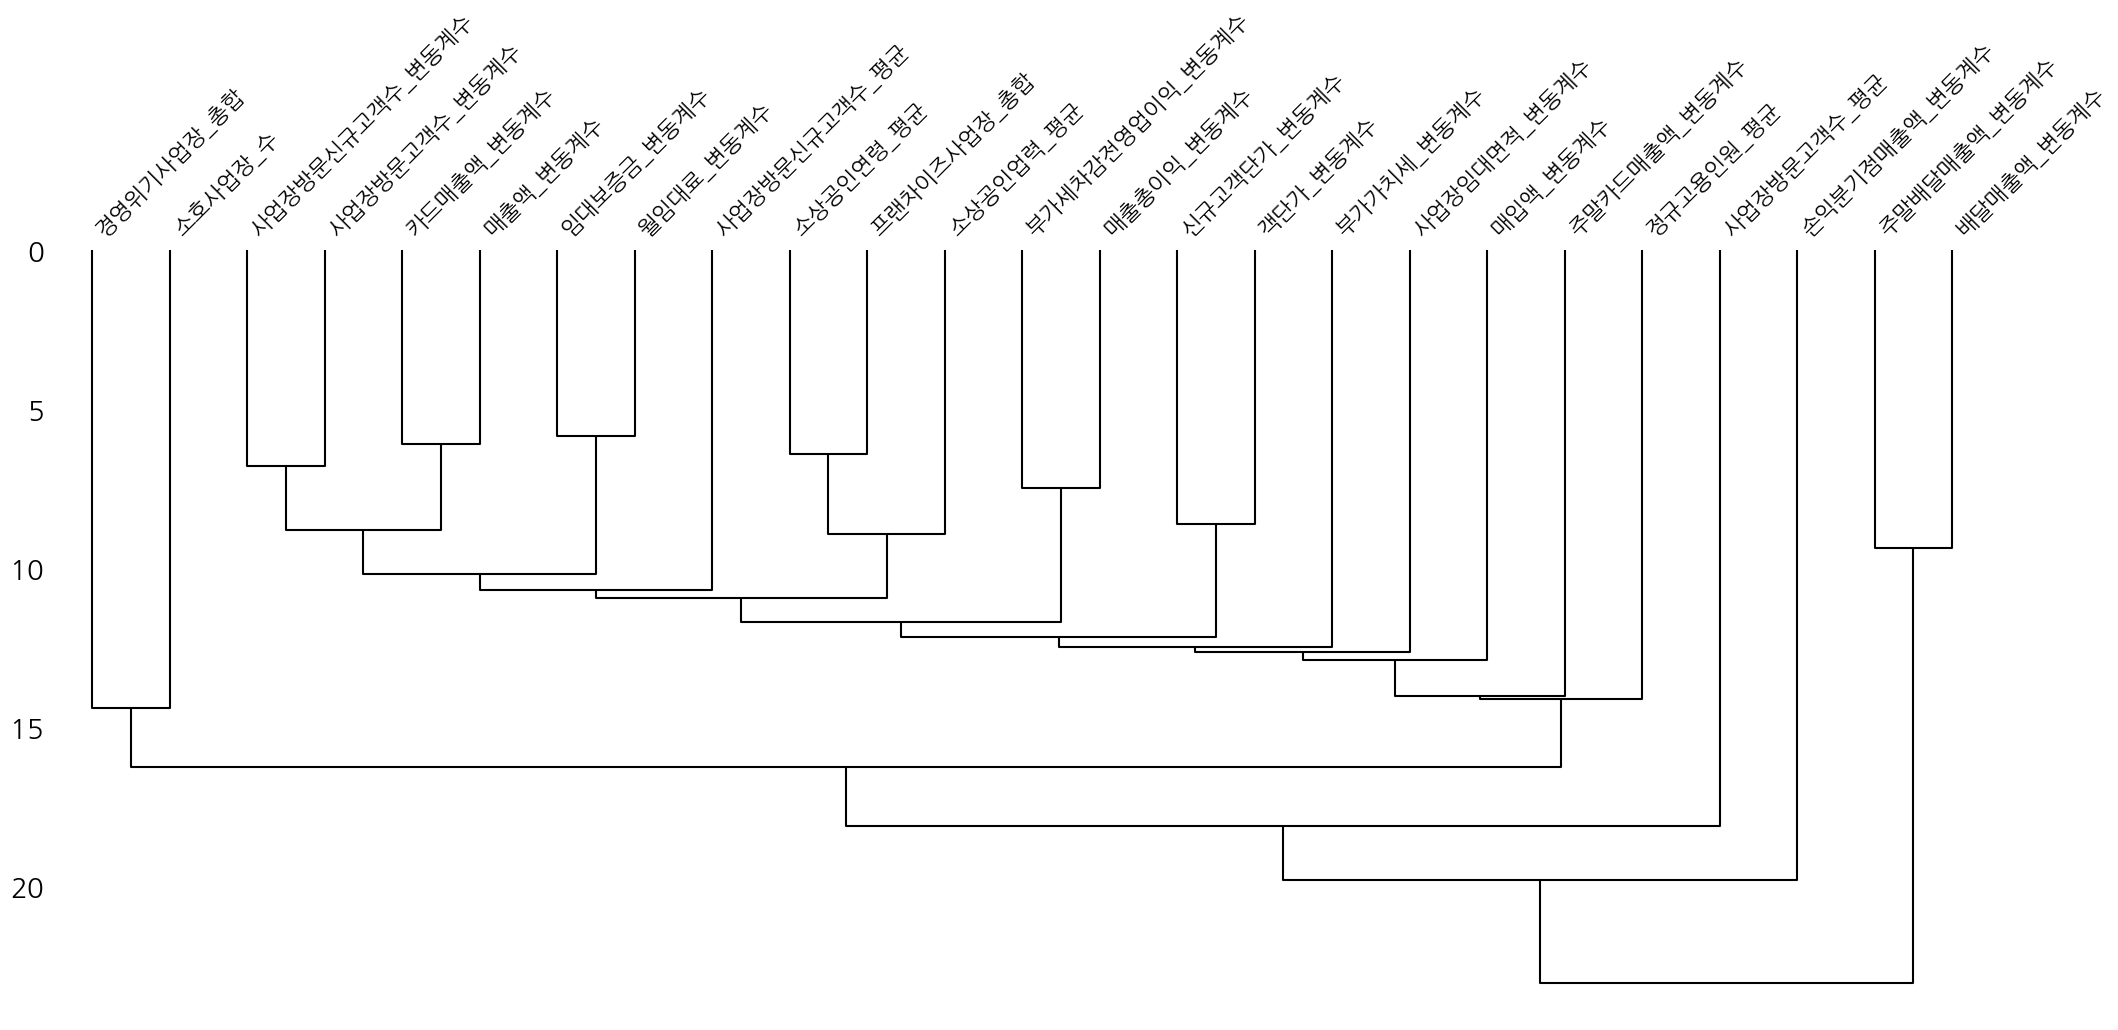

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


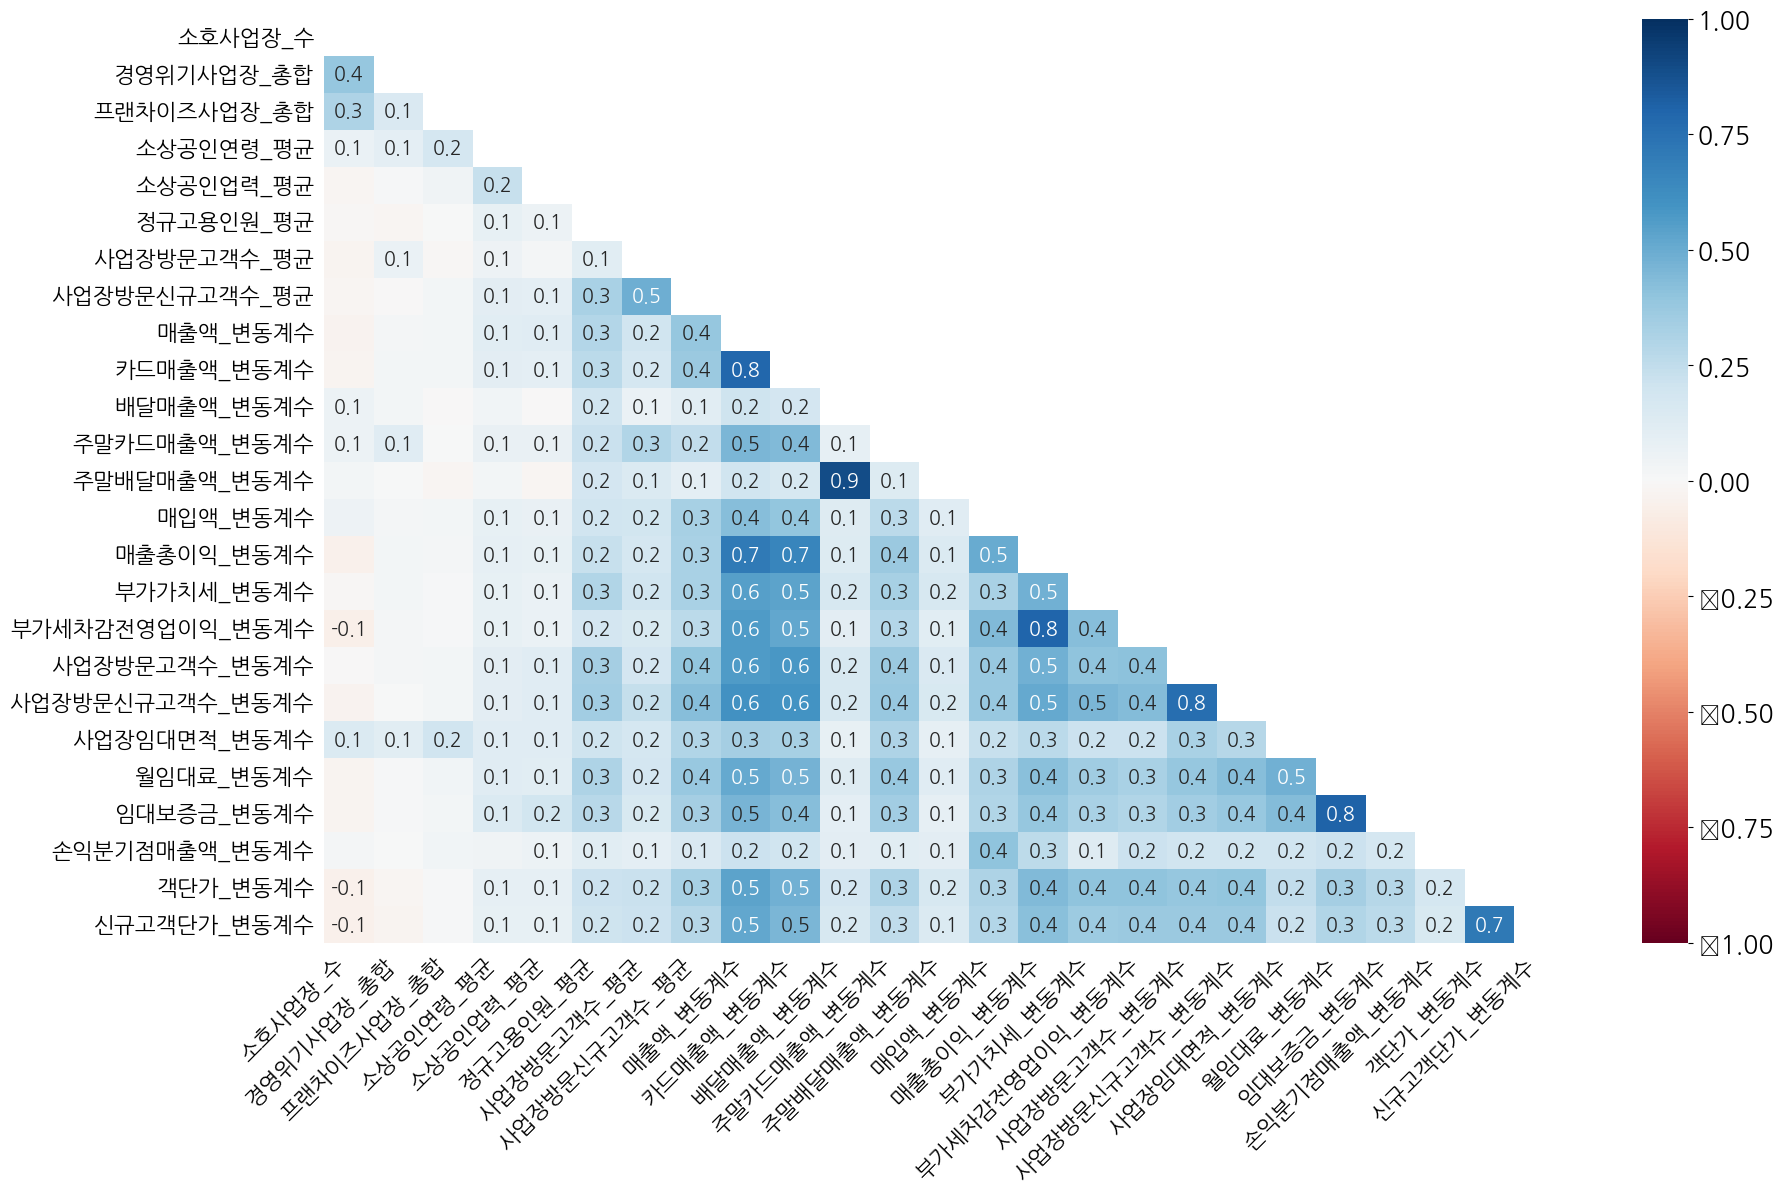

In [ ]:
# for index in range(0, 15, 1): preprocessing.visualizeNaN(data_index = index)
preprocessing.visualizeNaN(data_index = None)

In [ ]:
KCD_IMPUTED_LIST = []

for index in range(len(KCD_NUM_LIST)):

  imputed_data1 = preprocessing.NaNimputeKNearestNeighbor(
      dataframe = KCD_NUM_LIST[index],
      similar_column_list = ['배달매출액_변동계수','주말배달매출액_변동계수'])
  imputed_data2 = preprocessing.NaNimputeKNearestNeighbor(
      dataframe = KCD_NUM_LIST[index],
      similar_column_list = ['손익분기점매출액_변동계수'])
  imputed_data3 = preprocessing.NaNimputeKNearestNeighbor(
      dataframe = KCD_NUM_LIST[index],
      similar_column_list = ['사업장방문고객수_평균'])
  imputed_data4 = preprocessing.NaNimputeKNearestNeighbor(
      dataframe = KCD_NUM_LIST[index],
      similar_column_list = ['정규고용인원_평균'])
  imputed_data5 = preprocessing.NaNimputeKNearestNeighbor(
      dataframe = KCD_NUM_LIST[index],
      similar_column_list = ['주말카드매출액_변동계수'])
  imputed_data6 = preprocessing.NaNimputeKNearestNeighbor(
      dataframe = KCD_NUM_LIST[index],
      similar_column_list = ['매입액_변동계수'])
  imputed_data7 = preprocessing.NaNimputeKNearestNeighbor(
      dataframe = KCD_NUM_LIST[index],
      similar_column_list = ['사업장임대면적_변동계수'])
  imputed_data8 = preprocessing.NaNimputeKNearestNeighbor(
      dataframe = KCD_NUM_LIST[index],
      similar_column_list = ['부가가치세_변동계수'])
  imputed_data9 = preprocessing.NaNimputeKNearestNeighbor(
      dataframe = KCD_NUM_LIST[index],
      similar_column_list = ['객단가_변동계수','신규고객단가_변동계수'])
  imputed_data10 = preprocessing.NaNimputeKNearestNeighbor(
      dataframe = KCD_NUM_LIST[index],
      similar_column_list = ['매출총이익_변동계수','부가세차감전영업이익_변동계수'])
  imputed_data11 = preprocessing.NaNimputeKNearestNeighbor(
      dataframe = KCD_NUM_LIST[index],
      similar_column_list = ['소상공인업력_평균','프랜차이즈사업장_총합','소상공인연령_평균'])
  imputed_data12 = preprocessing.NaNimputeKNearestNeighbor(
      dataframe = KCD_NUM_LIST[index],
      similar_column_list = ['소호사업장_수','경영위기사업장_총합'])
  imputed_data13 = preprocessing.NaNimputeKNearestNeighbor(
      dataframe = KCD_NUM_LIST[index],
      similar_column_list = ['사업장방문신규고객수_평균','월임대료_변동계수','임대보증금_변동계수','매출액_변동계수','카드매출액_변동계수','사업장방문고객수_변동계수', '사업장방문신규고객수_변동계수'])

  KCD_IMPUTED_LIST.append(pd.concat(
      [imputed_data1, imputed_data2, imputed_data3, imputed_data4, imputed_data5, imputed_data6,
       imputed_data7, imputed_data8, imputed_data9, imputed_data10, imputed_data11, imputed_data12, imputed_data13],
      axis = 1))

<Axes: >

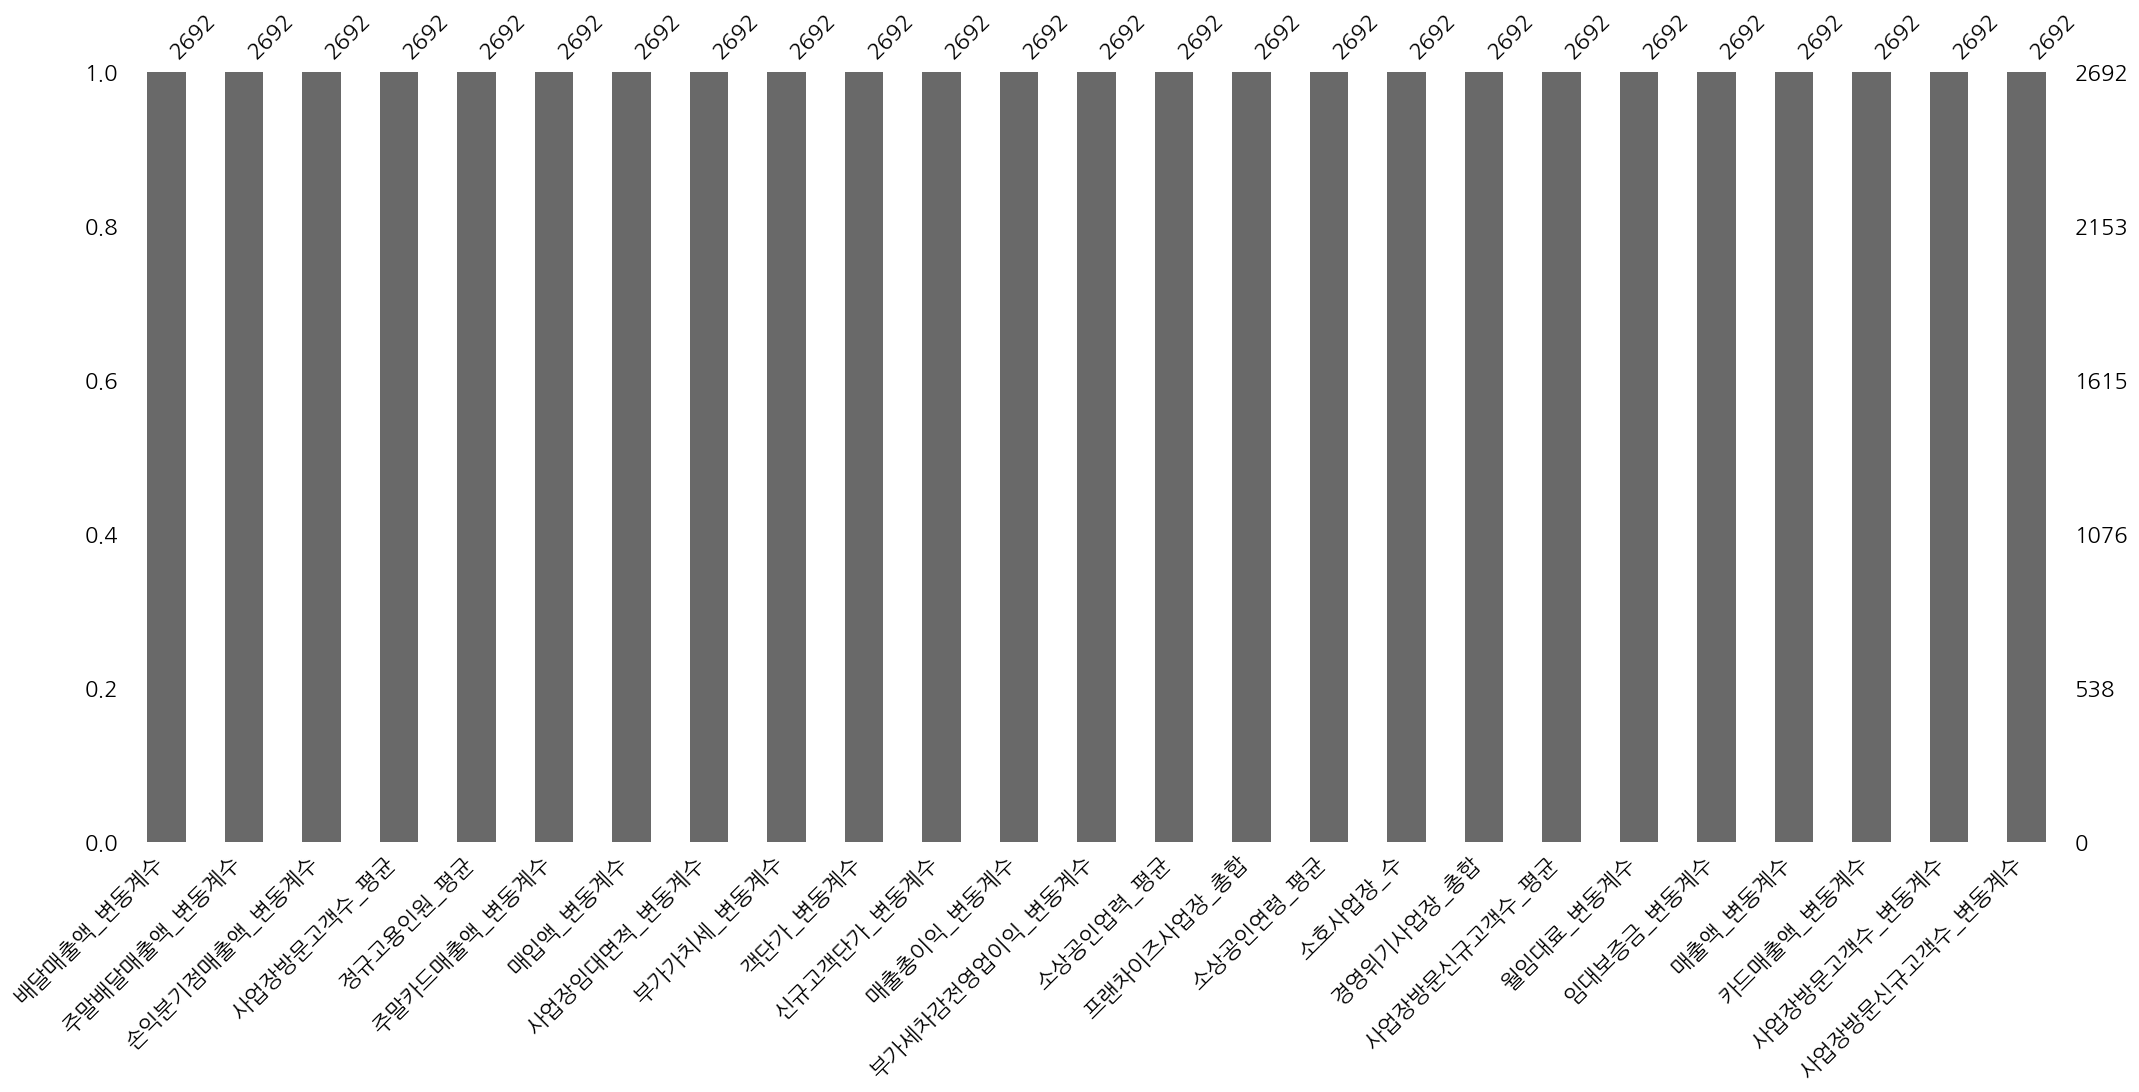

In [ ]:
msno.bar(pd.concat(KCD_IMPUTED_LIST))

In [ ]:
KCD_RAWDATA_LIST = preprocessing.splitIndexData()

KCD_RAWDATA = pd.concat(KCD_RAWDATA_LIST, axis = 0)
KCD_RAWDATA = KCD_RAWDATA[['기준일자','상권_식별자','상권코드','상권명','외식업종_중분류']]

KCD_IMPUTED = pd.concat(KCD_IMPUTED_LIST, axis = 0)
KCD_IMPUTED.reset_index(drop=True, inplace=True)
KCD_DATA = pd.concat([KCD_RAWDATA,  KCD_IMPUTED], axis = 1)
KCD_DATA.drop(columns = ['상권명', '외식업종_중분류'],inplace=True)
KCD_DATA[['상권명','외식업종_중분류']] = KCD_DATA['상권_식별자'].str.split('_',expand=True)

In [ ]:
# 칼럼명 정리
MARKET_CODE_NAME_MAP['상권_코드'] = MARKET_CODE_NAME_MAP['상권_코드'] - 1000000
MARKET_CODE_NAME_MAP = MARKET_CODE_NAME_MAP.rename(columns = {'상권_코드_명':'상권명','상권_코드':'상권코드'})
MARKET_CODE_NAME_MAP = MARKET_CODE_NAME_MAP[['상권코드','상권명']]

# 상권코드 NAN값 처리
KCD_DATA['상권코드'] = np.where(KCD_DATA['상권코드'].isna(),
                              np.where(KCD_DATA['상권명'].isin(MARKET_CODE_NAME_MAP['상권명']),
                                       KCD_DATA['상권명'].map(MARKET_CODE_NAME_MAP.set_index('상권명')['상권코드']),
                                       KCD_DATA['상권코드']),
                              KCD_DATA['상권코드'])

# 상권코드 2022, 2023 구분
KCD_DATA['기준년'] = KCD_DATA['기준일자'].astype('str').str[:4]
KCD_DATA.loc[KCD_DATA['기준년'] == '2023', '상권코드'] += 1000000
KCD_DATA.drop('기준년', axis = 1, inplace=True)
# KCD_DATA.to_csv('KCD_DATA.csv',encoding='euc-kr',index=False)

### 8. 분기별 상권데이터를 소호 신용데이터를 활용하여 월별로 확장(계절성 지수)

In [ ]:
# 7. Preprocess 수행 전 분석 진행을 위한 샘플코드

# KCD_2022_2023.drop("Unnamed: 0", axis = 1, inplace = True)
# KCD_2022_2023.fillna(0)
# KCD_상권코드 = KCD_2022_2023["상권코드"].unique().tolist()

In [ ]:
MARKET_2022_GROUPED = mountInstance.loadData(
    file_path = "/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/", file_name_extension = "MARKET_2022_GROUPED.csv",
    unicode = "utf-8", columnTF = False)

In [ ]:
MARKET_2023_GROUPED = mountInstance.loadData(
    file_path = "/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/", file_name_extension = "MARKET_2023_GROUPED.csv",
    unicode = "utf-8", columnTF = False)

```
MARKET_20221Q_GROUPED = MARKET_2022_GROUPED[MARKET_2022_GROUPED["기준_분기_코드"] == 1]
MARKET_20221Q_GROUPED["2022년도_상권_코드"] = MARKET_20221Q_GROUPED["상권_코드"].apply(lambda data: True if str(data)[0] == "2" else False)
Counter(MARKET_20221Q_GROUPED["2022년도_상권_코드"])
  # Counter({True: 1048, False: 1650})
MARKET_20221Q_GROUPED[MARKET_20221Q_GROUPED["2022년도_상권_코드"] == False]

MARKET_2022_GROUPED["2022년도_상권_코드"] = MARKET_2022_GROUPED["상권_코드"].apply(lambda data: True if str(data)[0] == "2" else False)
MARKET_2022_GROUPED = MARKET_2022_GROUPED[MARKET_2022_GROUPED["2022년도_상권_코드"] == True]
MARKET_2022_GROUPED.to_csv("/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/MARKET_2022_GROUPED.csv", index = False)
```

In [ ]:
KCD_COLUMNS = KCD_2022_2023.columns.tolist()
for column_name in ['Unnamed: 0', '기준일자','상권_식별자','상권코드','상권명','외식업종_중분류','소상공인연령_평균','소상공인업력_평균']:
  KCD_COLUMNS.remove(column_name)
print(KCD_COLUMNS, end = ", ")

['소호사업장_수', '경영위기사업장_총합', '프랜차이즈사업장_총합', '정규고용인원_평균', '사업장방문고객수_평균', '사업장방문신규고객수_평균', '매출액_변동계수', '카드매출액_변동계수', '배달매출액_변동계수', '주말카드매출액_변동계수', '주말배달매출액_변동계수', '매입액_변동계수', '매출총이익_변동계수', '부가가치세_변동계수', '부가세차감전영업이익_변동계수', '사업장방문고객수_변동계수', '사업장방문신규고객수_변동계수', '사업장임대면적_변동계수', '월임대료_변동계수', '임대보증금_변동계수', '손익분기점매출액_변동계수', '객단가_변동계수', '신규고객단가_변동계수'], 

In [ ]:
date_time1 = 202201
date_time2 = 202301

date_time_list = [str(date_time1 + n) for n in range(0, 12, 1)]
date_time_list.extend([str(date_time2 + n) for n in range(0, 3, 1)])
date_time_list = [int(date_time) for date_time in date_time_list]

In [ ]:
KCD_DATA_LIST = []

for i in range(0, 13, 3):
  KCD_DATA_LIST.append([KCD_2022_2023["기준일자"].isin(date_time_list[i:i+3])])

KCD_DATA_COLUMNS = KCD_DATA_LIST[0].iloc[:, 5:].columns

KCD_QUARTER_LIST = []

for i in range(0, 5, 1):
  KCD_QUARTER_LIST.append(KCD_DATA_LIST[i].groupby(["상권_식별자", "상권코드", "상권명", "외식업종_중분류"])[KCD_DATA_COLUMNS].sum())

In [ ]:
KCD_QUARTER_LIST[0]

,,,,소호사업장_수,경영위기사업장_총합,프랜차이즈사업장_총합,소상공인연령_평균,소상공인업력_평균,정규고용인원_평균,사업장방문고객수_평균,사업장방문신규고객수_평균,매출액_변동계수,카드매출액_변동계수,...,부가가치세_변동계수,부가세차감전영업이익_변동계수,사업장방문고객수_변동계수,사업장방문신규고객수_변동계수,사업장임대면적_변동계수,월임대료_변동계수,임대보증금_변동계수,손익분기점매출액_변동계수,객단가_변동계수,신규고객단가_변동계수
상권_식별자,상권코드,상권명,외식업종_중분류,,,,,,,,,,,,,,,,,,,,,
DMC(디지털미디어시티)_카페,2120098.0000,DMC(디지털미디어시티),카페,39.0000,5.0000,9.0000,118.7538,15.8077,2.4877,81.8985,18.4962,1.5432,1.5156,...,-1.9385,3.1428,2.2109,1.6058,1.2383,1.6023,1.6943,3.7018,2.0967,2.8979
DMC(디지털미디어시티)_한식,2120098.0000,DMC(디지털미디어시티),한식,10.0000,3.0000,0.0000,96.5200,10.9200,0.6160,7.1880,3.0540,1.0363,1.3143,...,-1.3091,1.7994,0.6026,0.6581,0.6776,0.5545,0.5861,0.3897,0.9063,0.8299
가락시장역_한식,2120234.0000,가락시장역,한식,17.0000,4.0000,9.0000,132.7400,16.0067,6.4333,14.1810,9.7910,3.0895,3.5132,...,-2.6248,3.5323,3.1365,2.8977,1.4835,1.7031,1.6620,1.2814,2.9556,3.2020
가로수길_술집,2120186.0000,가로수길,술집,21.0000,3.0000,3.0000,127.0714,17.7000,15.7500,10.4700,9.3329,4.0493,4.0561,...,-3.5006,5.1417,5.1404,5.1692,1.5978,3.0872,3.5018,2.5290,2.3615,2.3486
가로수길_일식,2120186.0000,가로수길,일식,20.0000,0.0000,3.0000,104.8310,10.9595,13.7964,19.9781,17.8964,1.5164,1.6048,...,-1.8868,1.5402,2.4219,2.4728,1.8144,1.0758,1.3111,1.1558,1.9000,1.8551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
홍대입구역(홍대)_술집,2120103.0000,홍대입구역(홍대),술집,126.0000,23.0000,6.0000,123.8119,13.5866,2.2827,14.2092,10.1920,3.0361,3.1050,...,-3.5953,4.0553,3.5411,2.9871,1.7449,1.7757,1.9475,1.5191,2.5742,3.0575
홍대입구역(홍대)_양식,2120103.0000,홍대입구역(홍대),양식,33.0000,4.0000,6.0000,115.0091,17.0182,3.3627,15.2241,11.5867,1.7982,2.5142,...,-1.7521,2.9558,2.3018,2.2656,2.6853,1.0386,1.2912,1.3337,2.3438,2.4007
홍대입구역(홍대)_일식,2120103.0000,홍대입구역(홍대),일식,18.0000,2.0000,0.0000,126.7500,10.9000,4.9600,16.0517,14.7500,2.5702,2.6020,...,-2.4427,3.3928,2.4173,2.4981,2.0207,2.4409,2.1412,1.9340,3.2148,3.1067


In [ ]:
MARKET_2022_GROUPED.drop("2022년도_상권_코드", axis = 1, inplace = True)

In [ ]:
MARKET_2022_GROUPED.head(3)

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,...,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
0,2022,1,2110001,이북5도청사,4305934.0000,8.0000,520427635.0000,129126028.0000,64853632.0000,37122367.0000,...,20911.0000,21071.0000,20786.0000,20856.0000,21802.0000,22313.0000,0.0000,0.0000,0.0000,0.0000
1,2022,1,2110002,독립문역 1번,3463885.0000,7.0000,232465205.0000,54998987.0000,28932090.0000,17084860.0000,...,43669.0000,43501.0000,43530.0000,43251.0000,42989.0000,42471.0000,0.0000,0.0000,0.0000,0.0000
2,2022,1,2110003,세검정초등학교,3548020.0000,7.0000,1349699230.0000,336704220.0000,166150296.0000,98720958.0000,...,56734.0000,57667.0000,57611.0000,56583.0000,58411.0000,59445.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
MARKET_DATA_1 = MARKET_2022_GROUPED[MARKET_2022_GROUPED['기준_분기_코드'] == 1]

In [ ]:
MARKET_DATA_2 = MARKET_2022_GROUPED[MARKET_2022_GROUPED['기준_분기_코드'] == 2]

In [ ]:
MARKET_DATA_3 = MARKET_2022_GROUPED[MARKET_2022_GROUPED['기준_분기_코드'] == 3]

In [ ]:
MARKET_DATA_4 = MARKET_2022_GROUPED[MARKET_2022_GROUPED['기준_분기_코드'] == 4]

In [ ]:
MARKET_2022_GROUPED[['기준_년_코드', '기준_분기_코드']] = MARKET_2022_GROUPED[['기준_년_코드', '기준_분기_코드']].astype("str")

In [ ]:
MARKET_2022_GROUPED["기준일자"] = MARKET_2022_GROUPED['기준_년_코드'] + "0" + MARKET_2022_GROUPED['기준_분기_코드']

In [ ]:
MARKET_2023_GROUPED

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,...,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
0,2023,1,3001491,이태원 관광특구,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,274678.0000,280164.0000,281485.0000,296158.0000,319069.0000,292968.0000,123.0000,61.0000,104.0000,52.0000
1,2023,1,3001492,명동 남대문 북창동 다동 무교동 관광특구,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1199754.0000,1200975.0000,1248387.0000,1209872.0000,762858.0000,568045.0000,145.0000,69.0000,104.0000,52.0000
2,2023,1,3001493,동대문패션타운 관광특구,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,528515.0000,528420.0000,541265.0000,501620.0000,375930.0000,364334.0000,147.0000,58.0000,104.0000,52.0000
3,2023,1,3001494,종로?청계 관광특구,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1339484.0000,1351829.0000,1392225.0000,1377047.0000,1009101.0000,737044.0000,147.0000,67.0000,104.0000,52.0000
4,2023,1,3001495,잠실 관광특구,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,595302.0000,601124.0000,606581.0000,613760.0000,621680.0000,565374.0000,133.0000,63.0000,104.0000,52.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,2023,1,3130323,둔촌역전통시장,0.0000,0.0000,764962470.0000,212600940.0000,92152548.0000,54122662.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,109.0000,46.0000,104.0000,52.0000
1646,2023,1,3130324,길동복조리시장,0.0000,0.0000,595074220.0000,151696675.0000,73524317.0000,44501832.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,102.0000,47.0000,104.0000,52.0000
1647,2023,1,3130325,명일전통시장,0.0000,0.0000,762846136.0000,200045982.0000,92132092.0000,50249063.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,102.0000,50.0000,104.0000,52.0000
1648,2023,1,3130326,고덕 골목형상점가,0.0000,0.0000,40697223.0000,11206611.0000,4772763.0000,2901471.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,70.0000,49.0000,104.0000,52.0000


In [ ]:
MARKET_2022_GROUPED

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,...,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균,기준일자
0,2022,1,2110001,이북5도청사,4305934.0000,8.0000,520427635.0000,129126028.0000,64853632.0000,37122367.0000,...,21071.0000,20786.0000,20856.0000,21802.0000,22313.0000,0.0000,0.0000,0.0000,0.0000,202201
1,2022,1,2110002,독립문역 1번,3463885.0000,7.0000,232465205.0000,54998987.0000,28932090.0000,17084860.0000,...,43501.0000,43530.0000,43251.0000,42989.0000,42471.0000,0.0000,0.0000,0.0000,0.0000,202201
2,2022,1,2110003,세검정초등학교,3548020.0000,7.0000,1349699230.0000,336704220.0000,166150296.0000,98720958.0000,...,57667.0000,57611.0000,56583.0000,58411.0000,59445.0000,0.0000,0.0000,0.0000,0.0000,202201
3,2022,1,2110004,대신고등학교,2644953.0000,6.0000,712772785.0000,205649728.0000,84170011.0000,51668351.0000,...,52107.0000,52086.0000,52161.0000,53644.0000,54136.0000,0.0000,0.0000,0.0000,0.0000,202201
4,2022,1,2110005,세검정,3703145.0000,7.0000,884701599.0000,221446948.0000,109882417.0000,64738346.0000,...,25036.0000,24905.0000,24807.0000,24531.0000,24132.0000,0.0000,0.0000,0.0000,0.0000,202201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,2022,4,2111085,묘곡초등학교(고덕아이파크아파트),2558553.0000,6.0000,5007325425.0000,1435306317.0000,590981199.0000,343018095.0000,...,100413.0000,99871.0000,97569.0000,102384.0000,104306.0000,0.0000,0.0000,0.0000,0.0000,202204
4188,2022,4,2111086,한영중고,2851749.0000,6.0000,1264810182.0000,350821529.0000,149392590.0000,83087315.0000,...,52172.0000,52580.0000,52837.0000,49719.0000,47718.0000,0.0000,0.0000,0.0000,0.0000,202204
4189,2022,4,2111087,고덕중학교(고덕2동주민센터),2493823.0000,6.0000,995226881.0000,307190926.0000,115234826.0000,64298750.0000,...,31221.0000,31050.0000,30171.0000,27473.0000,27081.0000,0.0000,0.0000,0.0000,0.0000,202204
4190,2022,4,2111088,고덕동성당,2369104.0000,5.0000,941528487.0000,283232544.0000,109891194.0000,63370941.0000,...,58331.0000,59270.0000,59084.0000,58517.0000,58130.0000,0.0000,0.0000,0.0000,0.0000,202204


In [ ]:
# MARKET_2022_GROUPED['기준_년_코드'] = MARKET_2022_GROUPED[0]['기준_년_코드'].apply(lambda MARKET_2022_GROUPED['기준_분기_코드']: str(MARKET_2022_GROUPED['기준_분기_코드'])

In [ ]:
for index in range(0, 5, 1):
  KCD_QUARTER_LIST[index] = KCD_QUARTER_LIST[index].reset_index()

In [ ]:
KCD_QUARTER_LIST[0]

,상권_식별자,상권코드,상권명,외식업종_중분류,소호사업장_수,경영위기사업장_총합,프랜차이즈사업장_총합,소상공인연령_평균,소상공인업력_평균,정규고용인원_평균,...,부가가치세_변동계수,부가세차감전영업이익_변동계수,사업장방문고객수_변동계수,사업장방문신규고객수_변동계수,사업장임대면적_변동계수,월임대료_변동계수,임대보증금_변동계수,손익분기점매출액_변동계수,객단가_변동계수,신규고객단가_변동계수
0,DMC(디지털미디어시티)_카페,2120098.0000,DMC(디지털미디어시티),카페,39.0000,5.0000,9.0000,118.7538,15.8077,2.4877,...,-1.9385,3.1428,2.2109,1.6058,1.2383,1.6023,1.6943,3.7018,2.0967,2.8979
1,DMC(디지털미디어시티)_한식,2120098.0000,DMC(디지털미디어시티),한식,10.0000,3.0000,0.0000,96.5200,10.9200,0.6160,...,-1.3091,1.7994,0.6026,0.6581,0.6776,0.5545,0.5861,0.3897,0.9063,0.8299
2,가락시장역_한식,2120234.0000,가락시장역,한식,17.0000,4.0000,9.0000,132.7400,16.0067,6.4333,...,-2.6248,3.5323,3.1365,2.8977,1.4835,1.7031,1.6620,1.2814,2.9556,3.2020
3,가로수길_술집,2120186.0000,가로수길,술집,21.0000,3.0000,3.0000,127.0714,17.7000,15.7500,...,-3.5006,5.1417,5.1404,5.1692,1.5978,3.0872,3.5018,2.5290,2.3615,2.3486
4,가로수길_일식,2120186.0000,가로수길,일식,20.0000,0.0000,3.0000,104.8310,10.9595,13.7964,...,-1.8868,1.5402,2.4219,2.4728,1.8144,1.0758,1.3111,1.1558,1.9000,1.8551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,홍대입구역(홍대)_술집,2120103.0000,홍대입구역(홍대),술집,126.0000,23.0000,6.0000,123.8119,13.5866,2.2827,...,-3.5953,4.0553,3.5411,2.9871,1.7449,1.7757,1.9475,1.5191,2.5742,3.0575
172,홍대입구역(홍대)_양식,2120103.0000,홍대입구역(홍대),양식,33.0000,4.0000,6.0000,115.0091,17.0182,3.3627,...,-1.7521,2.9558,2.3018,2.2656,2.6853,1.0386,1.2912,1.3337,2.3438,2.4007
173,홍대입구역(홍대)_일식,2120103.0000,홍대입구역(홍대),일식,18.0000,2.0000,0.0000,126.7500,10.9000,4.9600,...,-2.4427,3.3928,2.4173,2.4981,2.0207,2.4409,2.1412,1.9340,3.2148,3.1067
174,홍대입구역(홍대)_카페,2120103.0000,홍대입구역(홍대),카페,40.0000,7.0000,0.0000,110.7549,16.7060,3.8654,...,-3.5998,10.2885,1.7978,2.3028,2.2407,1.7490,4.7021,5.0779,3.7597,2.9365


In [ ]:
MARKET_1_stan = pd.merge(
    left = MARKET_DATA_1, right = KCD_QUARTER_LIST[0], # merge할 DataFrame 객체 이름
    how='outer', # left, rigth, inner (default), outer
    left_on = '상권_코드', # merge의 기준이 되는 Key 변수 # 왼쪽 DataFrame의 변수를 Key로 사용
    right_on = '상권코드') # 오른쪽 DataFrame의 변수를 Key로 사용

In [ ]:
MARKET_2_stan = pd.merge(
    left = MARKET_DATA_2, right = KCD_QUARTER_LIST[1], # merge할 DataFrame 객체 이름
    how='outer', # left, rigth, inner (default), outer
    left_on = '상권_코드', # merge의 기준이 되는 Key 변수 # 왼쪽 DataFrame의 변수를 Key로 사용
    right_on = '상권코드') # 오른쪽 DataFrame의 변수를 Key로 사용

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,...,부가가치세_변동계수,부가세차감전영업이익_변동계수,사업장방문고객수_변동계수,사업장방문신규고객수_변동계수,사업장임대면적_변동계수,월임대료_변동계수,임대보증금_변동계수,손익분기점매출액_변동계수,객단가_변동계수,신규고객단가_변동계수
0,2022.0000,1.0000,2110001.0000,이북5도청사,4305934.0000,8.0000,520427635.0000,129126028.0000,64853632.0000,37122367.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022.0000,1.0000,2110002.0000,독립문역 1번,3463885.0000,7.0000,232465205.0000,54998987.0000,28932090.0000,17084860.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022.0000,1.0000,2110003.0000,세검정초등학교,3548020.0000,7.0000,1349699230.0000,336704220.0000,166150296.0000,98720958.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022.0000,1.0000,2110004.0000,대신고등학교,2644953.0000,6.0000,712772785.0000,205649728.0000,84170011.0000,51668351.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022.0000,1.0000,2110005.0000,세검정,3703145.0000,7.0000,884701599.0000,221446948.0000,109882417.0000,64738346.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.5953,4.0553,3.5411,2.9871,1.7449,1.7757,1.9475,1.5191,2.5742,3.0575
1212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.7521,2.9558,2.3018,2.2656,2.6853,1.0386,1.2912,1.3337,2.3438,2.4007
1213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.4427,3.3928,2.4173,2.4981,2.0207,2.4409,2.1412,1.9340,3.2148,3.1067
1214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.5998,10.2885,1.7978,2.3028,2.2407,1.7490,4.7021,5.0779,3.7597,2.9365


In [ ]:
MARKET_3_stan = pd.merge(
    left = MARKET_DATA_3, right = KCD_QUARTER_LIST[2], # merge할 DataFrame 객체 이름
    how='outer', # left, rigth, inner (default), outer
    left_on = '상권_코드', # merge의 기준이 되는 Key 변수 # 왼쪽 DataFrame의 변수를 Key로 사용
    right_on = '상권코드') # 오른쪽 DataFrame의 변수를 Key로 사용

In [ ]:
MARKET_4_stan = pd.merge(
    left = MARKET_DATA_4, right = KCD_QUARTER_LIST[3], # merge할 DataFrame 객체 이름
    how='outer', # left, rigth, inner (default), outer
    left_on = '상권_코드', # merge의 기준이 되는 Key 변수 # 왼쪽 DataFrame의 변수를 Key로 사용
    right_on = '상권코드') # 오른쪽 DataFrame의 변수를 Key로 사용

In [ ]:
MARKET_5_stan = pd.merge(
    left = MARKET_2023_GROUPED, right = KCD_QUARTER_LIST[4], # merge할 DataFrame 객체 이름
    how='outer', # left, rigth, inner (default), outer
    left_on = '상권_코드', # merge의 기준이 되는 Key 변수 # 왼쪽 DataFrame의 변수를 Key로 사용
    right_on = '상권코드') # 오른쪽 DataFrame의 변수를 Key로 사용

In [ ]:
KCD_2022_2023.groupby(["기준일자"])[KCD_COLUMNS].mean()

,소호사업장_수,경영위기사업장_총합,프랜차이즈사업장_총합,정규고용인원_평균,사업장방문고객수_평균,사업장방문신규고객수_평균,매출액_변동계수,카드매출액_변동계수,배달매출액_변동계수,주말카드매출액_변동계수,...,부가가치세_변동계수,부가세차감전영업이익_변동계수,사업장방문고객수_변동계수,사업장방문신규고객수_변동계수,사업장임대면적_변동계수,월임대료_변동계수,임대보증금_변동계수,손익분기점매출액_변동계수,객단가_변동계수,신규고객단가_변동계수
기준일자,,,,,,,,,,,,,,,,,,,,,
202201,9.4360,0.0000,1.0349,1.2267,7.3746,4.2927,0.7301,0.7494,-1506.3299,1.0268,...,-0.7638,1.0726,0.7950,0.7959,0.6135,0.5910,0.6471,0.6880,0.9820,0.9565
202202,9.4457,2.0229,1.0229,1.2369,6.3140,3.5970,0.7453,0.7578,-1103.2051,1.0153,...,-0.8714,1.2776,0.8080,0.8059,0.6179,0.5934,0.6491,2.9181,0.9919,0.9696
202203,9.5314,1.8514,1.0457,1.2424,7.7046,4.4627,0.7282,0.7462,9906.4683,1.0130,...,-0.7641,1.0960,0.7979,0.7863,0.6178,0.5929,0.6524,0.6332,0.9878,0.9874
202204,9.4629,1.4857,1.0286,1.2482,9.0184,5.4369,0.7003,0.7260,8288.2723,0.9558,...,-0.7062,0.6290,0.7748,0.7601,0.6145,0.5907,0.6544,0.3317,0.9720,0.9718
202205,9.6000,1.1943,1.0229,1.2570,9.7836,6.0257,0.7116,0.7363,16628.0809,0.9817,...,-2.1084,0.9442,0.7861,0.7707,0.6243,0.5923,0.6599,0.2660,0.9723,0.9765
202206,9.6816,1.5363,1.0279,1.2463,9.1401,5.5638,0.5604,0.5465,15046335.9051,0.8115,...,-0.6777,0.7970,0.6120,0.5986,0.6173,0.5894,0.6555,1.1085,1.0131,1.0181
202207,9.8500,1.4333,1.0167,1.2396,9.4554,5.8039,0.7174,0.7397,-9030.3852,0.9934,...,-0.7595,0.9785,0.7965,0.7787,0.6176,0.5937,0.6505,0.4703,0.9611,0.9718
202208,9.9833,1.4667,1.0278,1.2510,8.9972,5.4261,0.7248,0.7469,-3869.3507,1.0102,...,-0.8139,0.6588,0.8004,0.7803,0.6178,0.5949,0.6801,0.3718,0.9639,0.9826
202209,10.1657,1.5525,1.0331,1.2599,8.8887,5.3430,0.7153,0.7391,-2603.0395,1.0142,...,-0.4591,1.1861,0.8042,0.7721,0.6287,0.5986,0.6629,0.8403,0.9514,0.9818


In [ ]:
SEASONAL_PATTERN = KCD_2022_2023.groupby(["기준일자"])[KCD_COLUMNS].mean()

In [ ]:
SEASONAL_PATTERN = SEASONAL_PATTERN / SEASONAL_PATTERN.mean()

In [ ]:
pd.set_option("display.max_column", None)
SEASONAL_PATTERN

,소호사업장_수,경영위기사업장_총합,프랜차이즈사업장_총합,정규고용인원_평균,사업장방문고객수_평균,사업장방문신규고객수_평균,매출액_변동계수,카드매출액_변동계수,배달매출액_변동계수,주말카드매출액_변동계수,주말배달매출액_변동계수,매입액_변동계수,매출총이익_변동계수,부가가치세_변동계수,부가세차감전영업이익_변동계수,사업장방문고객수_변동계수,사업장방문신규고객수_변동계수,사업장임대면적_변동계수,월임대료_변동계수,임대보증금_변동계수,손익분기점매출액_변동계수,객단가_변동계수,신규고객단가_변동계수
기준일자,,,,,,,,,,,,,,,,,,,,,,,
202201,0.9528,0.0000,1.0180,0.9591,0.8503,0.8241,1.0216,1.0186,-0.0013,1.0336,-0.0004,0.9594,1.1218,0.8633,1.1300,1.0074,1.0347,0.9881,0.9942,0.9817,3.5917,1.0059,0.9720
202202,0.9538,1.4188,1.0061,0.9671,0.7280,0.6905,1.0428,1.0301,-0.0009,1.0220,0.0016,1.0660,1.1044,0.9850,1.3460,1.0239,1.0477,0.9952,0.9982,0.9847,15.2345,1.0160,0.9852
202203,0.9624,1.2986,1.0286,0.9714,0.8883,0.8567,1.0189,1.0144,0.0085,1.0197,-0.0001,0.9752,1.2202,0.8637,1.1547,1.0111,1.0222,0.9950,0.9973,0.9898,3.3060,1.0119,1.0034
202204,0.9555,1.0421,1.0118,0.9759,1.0398,1.0437,0.9799,0.9868,0.0071,0.9621,0.0005,0.9575,1.0251,0.7983,0.6626,0.9819,0.9882,0.9896,0.9936,0.9928,1.7315,0.9956,0.9876
202205,0.9694,0.8377,1.0061,0.9828,1.1280,1.1568,0.9956,1.0009,0.0143,0.9883,0.0005,0.9176,0.9729,2.3832,0.9948,0.9962,1.0019,1.0055,0.9963,1.0012,1.3886,0.9960,0.9923
202206,0.9776,1.0776,1.0111,0.9744,1.0538,1.0681,0.7842,0.7429,12.9139,0.8169,11.9954,0.9526,0.7913,0.7661,0.8397,0.7756,0.7783,0.9942,0.9914,0.9945,5.7873,1.0378,1.0346
202207,0.9946,1.0053,1.0000,0.9692,1.0902,1.1142,1.0038,1.0054,-0.0078,1.0000,NaN,0.9327,0.9907,0.8585,1.0310,1.0093,1.0124,0.9947,0.9986,0.9868,2.4555,0.9845,0.9875
202208,1.0081,1.0287,1.0110,0.9781,1.0373,1.0416,1.0142,1.0153,-0.0033,1.0169,0.0007,0.8904,0.9955,0.9200,0.6941,1.0143,1.0144,0.9950,1.0007,1.0318,1.9408,0.9874,0.9984
202209,1.0265,1.0889,1.0163,0.9851,1.0248,1.0257,1.0007,1.0047,-0.0022,1.0209,0.0011,0.9506,1.0406,0.5190,1.2496,1.0190,1.0038,1.0126,1.0069,1.0057,4.3873,0.9746,0.9977


In [ ]:
KCD_DATA = mountInstance.loadData(
    file_path = "/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/", file_name_extension = "KCD_DATA.csv",
    unicode = "euc-kr", columnTF = False)

MARKET_2022_GROUPED = mountInstance.loadData(
    file_path = "/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/", file_name_extension = "MARKET_2022_GROUPED.csv",
    unicode = "utf-8", columnTF = False)

MARKET_2023_GROUPED = mountInstance.loadData(
    file_path = "/content/drive/MyDrive/2023BigContest/data/DESILO_PLATFORM_DATA/", file_name_extension = "MARKET_2023_GROUPED.csv",
    unicode = "utf-8", columnTF = False)

In [ ]:
KCD_COLUMNS = KCD_DATA.columns.tolist()
for column_name in ['기준일자','상권_식별자','상권코드','상권명','외식업종_중분류','소상공인연령_평균','소상공인업력_평균']:
    KCD_COLUMNS.remove(column_name)

## 계절성 지수 계산
SEASONAL_PATTERN = KCD_DATA.groupby(["기준일자"])[KCD_COLUMNS].mean()
SEASONAL_PATTERN = SEASONAL_PATTERN / SEASONAL_PATTERN.mean()
pd.set_option("display.max_column", None)
SEASONAL_PATTERN = SEASONAL_PATTERN.reset_index()

## 계절성 지수 평균 값 계산
SEASONAL_PATTERN_mean = SEASONAL_PATTERN[SEASONAL_PATTERN.iloc[:,1:].columns].mean(axis=1)
SEASONAL_PATTERN['SEASEONAL_MEAN'] = SEASONAL_PATTERN_mean
SEASONAL_PATTERN

,기준일자,배달매출액_변동계수,주말배달매출액_변동계수,손익분기점매출액_변동계수,사업장방문고객수_평균,정규고용인원_평균,주말카드매출액_변동계수,매입액_변동계수,사업장임대면적_변동계수,부가가치세_변동계수,객단가_변동계수,신규고객단가_변동계수,매출총이익_변동계수,부가세차감전영업이익_변동계수,프랜차이즈사업장_총합,소호사업장_수,경영위기사업장_총합,사업장방문신규고객수_평균,월임대료_변동계수,임대보증금_변동계수,매출액_변동계수,카드매출액_변동계수,사업장방문고객수_변동계수,사업장방문신규고객수_변동계수,SEASEONAL_MEAN
0,202201,0.9564,0.9403,1.0283,0.8896,0.9341,1.0471,0.9759,0.9857,1.0235,1.0014,0.9747,1.0846,1.1379,1.0259,0.9318,0.0000,0.8081,0.9975,0.9819,1.0283,1.0127,1.0051,1.0189,0.9474
1,202202,0.9463,0.9294,1.0386,0.7282,0.9521,1.0424,0.9568,0.9954,1.0477,1.0148,0.9817,1.1198,1.2125,1.0131,0.9641,1.4374,0.6889,0.9954,0.9821,1.0434,1.0384,1.0330,1.0535,1.0093
2,202203,0.9631,0.9463,1.0649,0.8732,0.9560,0.9920,0.9943,0.9919,1.0448,1.0062,0.9964,1.0634,1.0810,1.0083,0.9691,1.3578,0.8323,1.0008,0.9923,1.0342,1.0246,1.0135,1.0121,1.0095
3,202204,0.9669,0.9482,1.0430,1.0069,0.9614,0.9471,0.9611,0.9860,1.0300,0.9872,0.9823,0.9890,0.9838,0.9937,0.9657,1.0511,1.0550,1.0015,0.9976,0.9859,0.9931,0.9983,0.9950,0.9926
4,202205,0.9459,0.9293,0.9974,1.1129,1.0043,0.9883,0.9203,0.9944,1.0091,0.9943,0.9881,0.9936,0.9728,0.9853,0.9750,0.9001,1.1702,1.0013,1.0035,0.9941,0.9944,1.0111,1.0115,0.9955
5,202206,1.2375,1.4159,0.9060,1.0287,0.9557,0.7879,0.8320,0.9901,0.7101,0.9986,1.0347,0.7645,0.7561,0.9998,0.9767,0.9423,1.0849,0.9950,1.0027,0.7577,0.7308,0.7416,0.7380,0.9299
6,202207,0.9833,0.9703,1.0073,1.0827,0.9546,0.9991,0.9336,0.9935,1.0152,0.9991,1.0049,1.0097,1.0002,0.9850,0.9869,1.0962,1.1216,1.0044,0.9948,1.0087,1.0122,1.0264,1.0288,1.0095
7,202208,0.9956,0.9880,1.0277,1.0260,0.9774,1.0178,0.9151,0.9747,1.0105,0.9986,0.9932,1.0256,1.0115,0.9967,1.0075,1.0686,1.0470,1.0020,1.0105,1.0196,1.0188,1.0262,1.0272,1.0081
8,202209,0.9933,0.9908,1.0763,1.0205,0.9845,1.0248,0.9747,1.0368,1.0294,0.9968,1.0071,0.9976,0.9876,1.0053,1.0085,0.9337,1.0380,1.0010,1.0064,1.0039,1.0070,1.0129,1.0001,1.0060
9,202210,0.9962,0.9878,1.0520,1.0793,0.9694,1.0150,0.9597,1.0259,1.0197,0.9978,1.0012,1.0037,0.9970,0.9908,1.0598,0.9768,1.0832,0.9969,0.9975,1.0164,1.0238,1.0089,1.0211,1.0122


In [ ]:
MARKET_2022_GROUPED['월'] = MARKET_2022_GROUPED['기준_분기_코드'].apply(lambda x: '1 2 3' if x == 1 else ('4 5 6' if x == 2 else ('7 8 9' if x == 3 else ('10 11 12' if x == 4 else x))))
MARKET_2023_GROUPED['월'] = MARKET_2023_GROUPED['기준_분기_코드'].apply(lambda x:'1 2 3' if x == 1 else x)

## '월' 칼럼의 값을 공백을 기준으로 분리
MARKET_2022_GROUPED['월'] = MARKET_2022_GROUPED['월'].str.split()
MARKET_2023_GROUPED['월'] = MARKET_2023_GROUPED['월'].str.split()

## '월' 칼럼을 분리하기 위해 데이터프레임을 재구성
tmp_2022 = pd.DataFrame({'기준_월_코드': np.concatenate(MARKET_2022_GROUPED['월'].values)})
tmp_2023 = pd.DataFrame({'기준_월_코드': np.concatenate(MARKET_2023_GROUPED['월'].values)})

## 데이터를 인덱스 기준으로 확장
expand_mon_2022 = MARKET_2022_GROUPED.loc[MARKET_2022_GROUPED.index.repeat(3)].reset_index(drop=True)
expand_mon_2022 = expand_mon_2022.drop(columns = '월')
expand_mon_2023 = MARKET_2023_GROUPED.loc[MARKET_2023_GROUPED.index.repeat(3)].reset_index(drop=True)
expand_mon_2023 = expand_mon_2023.drop(columns = '월')

## 확장된 데이터 병합
market_2022_mon = pd.concat([expand_mon_2022,tmp_2022],axis=1)
market_2023_mon = pd.concat([expand_mon_2023,tmp_2023],axis=1)

## DATA_CRTR_YM 칼럼 생성(기준년도+기준월)
market_2022_mon['기준_월_코드'] = market_2022_mon['기준_월_코드'].apply(lambda x : '0' + x if len(x) == 1 else x)
market_2023_mon['기준_월_코드'] = market_2023_mon['기준_월_코드'].apply(lambda x : '0' + x if len(x) == 1 else x)

market_2022_mon.iloc[:,0] = market_2022_mon['기준_년_코드'].astype('str') + market_2022_mon['기준_월_코드'].astype('str')
market_2022_mon = market_2022_mon.rename(columns = {'기준_년_코드':'기준일자'})
market_2022_mon['기준일자'] = market_2022_mon['기준일자'].astype('int64')

market_2023_mon.iloc[:,0] = market_2023_mon['기준_년_코드'].astype('str') + market_2023_mon['기준_월_코드'].astype('str')
market_2023_mon = market_2023_mon.rename(columns = {'기준_년_코드':'기준일자'})
market_2023_mon['기준일자'] = market_2023_mon['기준일자'].astype('int64')

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
market_2022_mon

,기준일자,기준_분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액,아파트_단지_수,아파트_가격_1_억_미만_세대_수,아파트_가격_1_억_세대_수,아파트_가격_2_억_세대_수,아파트_가격_3_억_세대_수,아파트_가격_4_억_세대_수,아파트_가격_5_억_세대_수,아파트_가격_6_억_이상_세대_수,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,집객시설_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,초등학교_수,중학교_수,고등학교_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,연령대_20_생활인구_수,연령대_30_생활인구_수,연령대_40_생활인구_수,연령대_50_생활인구_수,연령대_60_이상_생활인구_수,시간대_1_생활인구_수,시간대_2_생활인구_수,시간대_3_생활인구_수,시간대_4_생활인구_수,시간대_5_생활인구_수,시간대_6_생활인구_수,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균,2022년도_상권_코드,기준_월_코드
0,202201,1,2110001,이북5도청사,4305934.0000,8.0000,520427635.0000,129126028.0000,64853632.0000,37122367.0000,65974602.0000,88343761.0000,22223650.0000,14656697.0000,76185341.0000,21941557.0000,21.0000,11.0000,4.0000,35.0000,105.0000,111.0000,25.0000,59.0000,1.7391,1.8696,0.0000,0.0000,0.0000,0.0000,0.1304,42.0000,2.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,24.0000,148832.0000,66007.0000,82825.0000,26170.0000,16060.0000,14849.0000,23481.0000,25024.0000,43248.0000,37996.0000,31763.0000,17719.0000,17631.0000,24492.0000,19232.0000,21094.0000,20911.0000,21071.0000,20786.0000,20856.0000,21802.0000,22313.0000,0.0000,0.0000,0.0000,0.0000,True,01
1,202202,1,2110001,이북5도청사,4305934.0000,8.0000,520427635.0000,129126028.0000,64853632.0000,37122367.0000,65974602.0000,88343761.0000,22223650.0000,14656697.0000,76185341.0000,21941557.0000,21.0000,11.0000,4.0000,35.0000,105.0000,111.0000,25.0000,59.0000,1.7391,1.8696,0.0000,0.0000,0.0000,0.0000,0.1304,42.0000,2.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,24.0000,148832.0000,66007.0000,82825.0000,26170.0000,16060.0000,14849.0000,23481.0000,25024.0000,43248.0000,37996.0000,31763.0000,17719.0000,17631.0000,24492.0000,19232.0000,21094.0000,20911.0000,21071.0000,20786.0000,20856.0000,21802.0000,22313.0000,0.0000,0.0000,0.0000,0.0000,True,02
2,202203,1,2110001,이북5도청사,4305934.0000,8.0000,520427635.0000,129126028.0000,64853632.0000,37122367.0000,65974602.0000,88343761.0000,22223650.0000,14656697.0000,76185341.0000,21941557.0000,21.0000,11.0000,4.0000,35.0000,105.0000,111.0000,25.0000,59.0000,1.7391,1.8696,0.0000,0.0000,0.0000,0.0000,0.1304,42.0000,2.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,24.0000,148832.0000,66007.0000,82825.0000,26170.0000,16060.0000,14849.0000,23481.0000,25024.0000,43248.0000,37996.0000,31763.0000,17719.0000,17631.0000,24492.0000,19232.0000,21094.0000,20911.0000,21071.0000,20786.0000,20856.0000,21802.0000,22313.0000,0.0000,0.0000,0.0000,0.0000,True,03
3,202201,1,2110002,독립문역 1번,3463885.0000,7.0000,232465205.0000,54998987.0000,28932090.0000,17084860.0000,28271372.0000,40933079.0000,10180461.0000,6575012.0000,35805283.0000,9684061.0000,7.0000,4.0000,13.0000,27.0000,21.0000,0.0000,0.0000,49.0000,2.5882,2.7941,5.1471,0.0882,0.0000,0.0000,0.2059,57.0000,3.0000,1.0000,1.0000,0.0000,4.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,18.0000,302828.0000,137022.0000,165805.0000,57664.0000,36328.0000,36814.0000,45191.0000,46192.0000,80639.0000,75051.0000,63637.0000,36875.0000,37844.0000,50467.0000,38952.0000,43417.0000,43669.0000,43501.0000,43530.0000,43251.0000,42989.0000,42471.0000,0.0000,0.0000,0.0000,0.0000,True,01
4,202202,1,2110002,독립문역 1번,3463885.0000,7.0000,232465205.0000,54998987.0000,28932090.0000,17084860.0000,28271372.0000,40933079.0000,10180461.0000,6575012.0000,35805283.0000,9684061.0000,7.0000,4.0000,13.0000,27.0000,21.0000,0.0000,0.0000,49.0000,2.5882,2.7941,5.1471,0.0882,0.0000,0.0000,0.2059,57.00

In [ ]:
market_2022_mon[market_2022_mon['상권_코드'] == 2120234]

,기준일자,기준_분기_코드,상권_코드,상권_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액,아파트_단지_수,아파트_가격_1_억_미만_세대_수,아파트_가격_1_억_세대_수,아파트_가격_2_억_세대_수,아파트_가격_3_억_세대_수,아파트_가격_4_억_세대_수,아파트_가격_5_억_세대_수,아파트_가격_6_억_이상_세대_수,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,집객시설_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,초등학교_수,중학교_수,고등학교_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,연령대_20_생활인구_수,연령대_30_생활인구_수,연령대_40_생활인구_수,연령대_50_생활인구_수,연령대_60_이상_생활인구_수,시간대_1_생활인구_수,시간대_2_생활인구_수,시간대_3_생활인구_수,시간대_4_생활인구_수,시간대_5_생활인구_수,시간대_6_생활인구_수,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균,2022년도_상권_코드,기준_월_코드


In [ ]:
KCD_DATA

,기준일자,상권_식별자,상권코드,배달매출액_변동계수,주말배달매출액_변동계수,손익분기점매출액_변동계수,사업장방문고객수_평균,정규고용인원_평균,주말카드매출액_변동계수,매입액_변동계수,사업장임대면적_변동계수,부가가치세_변동계수,객단가_변동계수,신규고객단가_변동계수,매출총이익_변동계수,부가세차감전영업이익_변동계수,소상공인업력_평균,프랜차이즈사업장_총합,소상공인연령_평균,소호사업장_수,경영위기사업장_총합,사업장방문신규고객수_평균,월임대료_변동계수,임대보증금_변동계수,매출액_변동계수,카드매출액_변동계수,사업장방문고객수_변동계수,사업장방문신규고객수_변동계수,상권명,외식업종_중분류
0,202201,DMC(디지털미디어시티)_카페,2120098,2.1558,2.5660,0.5387,6.3708,0.8292,1.3211,0.7483,0.4128,-0.6996,0.7058,0.9996,0.9649,1.1789,5.2692,3.0000,39.5846,13.0000,0.0000,6.6692,0.5341,0.5648,0.4986,0.4845,0.7065,0.4988,DMC(디지털미디어시티),카페
1,202201,가락시장역_한식,2120234,1.8341,1.9303,0.4745,4.9360,2.3500,1.4125,0.5770,0.5250,-0.7722,0.9883,1.0187,1.0797,1.1607,5.8400,3.0000,44.9400,5.0000,0.0000,3.3360,0.5646,0.5735,1.0273,1.1870,1.0395,1.0085,가락시장역,한식
2,202201,가로수길_술집,2120186,2.4496,2.4495,0.7954,3.3886,1.0431,1.6146,0.8874,0.5326,-1.3127,0.8118,0.8000,1.5937,1.8294,5.9000,1.0000,42.3571,7.0000,0.0000,2.9971,1.0291,1.1673,0.8737,0.9827,1.1755,0.9964,가로수길,술집
3,202201,가로수길_일식,2120186,2.4495,2.4495,0.3542,6.6600,1.0431,0.3888,0.6522,0.6296,-0.6643,0.5502,0.5487,0.4792,0.4953,3.5714,1.0000,34.6571,7.0000,0.0000,5.9857,0.3630,0.4541,0.4905,0.4996,0.8916,0.8940,가로수길,일식
4,202201,가로수길_한식,2120186,2.0289,2.0816,0.2583,9.8900,1.0431,1.0227,0.6220,0.3451,-0.5937,0.7582,0.7741,0.6349,0.6890,4.6429,2.0000,41.9143,7.0000,0.0000,6.4200,0.2461,0.3202,0.6021,0.6021,0.7941,0.7777,가로수길,한식
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,202303,홍대입구역(홍대)_한식,3120103,2.0752,1.8920,0.7577,7.5168,1.6514,1.0790,1.0970,0.8892,-0.9489,1.2670,1.2298,1.0959,1.1860,3.9571,2.0000,37.7571,11.2000,3.0000,5.7888,0.6365,0.7507,0.9257,1.0410,0.7307,0.7528,홍대입구역(홍대),한식
2688,202303,선릉역_카페,3120210,2.1606,2.2517,0.5606,7.7299,1.2906,0.9155,0.7616,0.5936,-0.7855,0.9229,0.9638,0.8262,0.9013,4.2167,1.0000,35.3167,6.0000,1.0000,5.3143,0.5803,0.6383,0.7098,0.7216,0.7822,0.7560,선릉역,카페
2689,202303,"신촌역(신촌역, 신촌로터리)_카페",3120094,2.1606,2.2517,0.5606,7.7299,1.2906,0.9155,0.7616,0.5936,-0.7855,0.9229,0.9638,0.8262,0.9013,5.2400,1.0000,42.8600,5.0000,0.0000,5.3143,0.5803,0.6383,0.7098,0.7216,0.7822,0.7560,"신촌역(신촌역, 신촌로터리)",카페
2690,202303,"총신대입구역(이수, 총신대)_카페",3120156,2.1606,2.2517,0.5606,7.7299,1.2906,0.9155,0.7616,0.5936,-0.7855,0.9229,0.9638,0.8262,0.9013,3.9800,2.0000,32.8800,5.0000,2.0000,5.3143,0.5803,0.6383,0.7098,0.7216,0.7822,0.7560,"총신대입구역(이수, 총신대)",카페


In [ ]:
KCD_DATA['상권코드'].unique()

array([2120098, 2120234, 2120186, 2120131, 2120203, 2120189, 2120242,
       2120122, 2120053, 2120064, 2120003, 2120173, 2120129, 2120130,
       2120198, 2120056, 2120148, 2120055, 2120246, 2120153, 2120081,
       2120185, 2120143, 2120012, 2130195, 2120051, 2130318, 2120204,
       2120118, 2110544, 2120248, 2120111, 2110759, 2120235, 2120119,
       2110008, 2120192, 2120160, 2120105, 2130183, 2110895, 2120159,
       2110074, 2130285, 2120002, 2120210, 2130241, 2120052, 2120072,
       2120224, 2120076, 2120187, 2110869, 2120157, 2120178, 2120041,
       2120094, 2110313, 2120202, 2120179, 2110648, 2120194, 2120149,
       2120197, 2120104, 2130167, 2110562, 2120093, 2120136, 2120145,
       2120049, 2120031, 2120008, 2120225, 2120067, 2120066, 2120009,
       2120243, 2120156, 2120032, 2120215, 2120184, 2120200, 2120101,
       2110081, 2130191, 2120103, 2120102, 2120054, 2120006, 2110564,
       2111013, 2120245, 2120078, 3120098, 3120234, 3120186, 3120131,
       3120203, 3120

In [ ]:
market_2022_mon['상권_코드'].unique()

array([2110001, 2110002, 2110003, 2110004, 2110005, 2110006, 2110007,
       2110008, 2110009, 2110010, 2110011, 2110012, 2110013, 2110014,
       2110015, 2110016, 2110017, 2110018, 2110020, 2110021, 2110022,
       2110023, 2110024, 2110025, 2110027, 2110028, 2110029, 2110030,
       2110031, 2110033, 2110035, 2110036, 2110037, 2110038, 2110039,
       2110040, 2110041, 2110042, 2110043, 2110044, 2110045, 2110046,
       2110047, 2110048, 2110049, 2110050, 2110051, 2110052, 2110053,
       2110054, 2110055, 2110056, 2110057, 2110058, 2110059, 2110060,
       2110061, 2110062, 2110063, 2110064, 2110065, 2110066, 2110067,
       2110068, 2110069, 2110070, 2110071, 2110073, 2110074, 2110075,
       2110077, 2110078, 2110079, 2110080, 2110081, 2110082, 2110083,
       2110084, 2110085, 2110086, 2110087, 2110088, 2110089, 2110090,
       2110092, 2110093, 2110095, 2110096, 2110097, 2110098, 2110099,
       2110100, 2110101, 2110102, 2110103, 2110104, 2110105, 2110106,
       2110107, 2110